## Created by: Naufal Daffa Abdurahman

# 1. **Business Understanding**
---

[Daegu](https://en.wikipedia.org/wiki/Daegu) is South Korea's third-largest urban agglomeration after Seoul and Busan, the third-largest official metropolitan area in the country with over 2.5 million residents and the second-largest city in the Yeongnam region in the southeastern Korean Peninsula after Busan. However, the real estate market in Daegu faces significant challenges due to an increasing number of unsold apartment units

**1.1 Problem Statement**

[As of December 2023](https://koreajoongangdaily.joins.com/2023/02/07/business/industry/housing/20230207175620058.html), the number of unsold apartments nationwide reached 68,000 units, the highest in seven years since 2015. This increase in unsold units is more pronounced outside Seoul, where the unsold inventory rose by 19.8%​. In Daegu, the number of unsold apartments has surged, exacerbating concerns about market stability and economic impact. 

The real estate market in Daegu is experiencing an **oversupply of unsold apartment units, leading to market instability and financial challenges for property owners and developers.** This situation necessitates the development of an accurate apartment price prediction model to provide **realistic price expectations, stabilize the market, and ensure affordability** for potential buyers.


**1.2 Goal**

In this scenario, as startup focused on real estate technology consultant, I have the goal to develop a robust apartment price prediction model for Daegu using machine learning techniques. This model aims to:
- Provide realistic price estimates for apartment units.
- Ensure housing affordability for potential buyers.
- Support property owners in setting competitive prices that reflect current market conditions.
- Help stabilize the local real estate market by reducing the volume of unsold units.


**1.3 Project Stakeholder**

Project stakeholders are those with any interest in your project's outcome,

- **Property Owners and Developers**: to set competitive prices for new and existing apartment units.

- **Real Estate Agents**: to provide data-driven pricing advice to their clients, enhancing their service offerings and credibility.

- **Prospective Buyers**: to make informed purchasing decisions and ensure they are getting fair market value.

**1.4 Analytic Approach**

We will create a regression model based on features that we have (except SalePrice) to determine the price of the apartment unit based on the specifications owned.

This regression model will be invaluable for homeowners / buyers seeking guidance in setting the optimal selling/buying price for apartments. And this model also can give estimated price to propective buyers.

The key steps in this approach are outlined below:

1. **Business Understanding**: the profound knowledge and insight into the core aspects of an organization's operations, its market, and its customers

2. **Import Library**: include a library in a program so that use the function is defined in that library

3. **Data Understanding**: Describe the initial exploration of the data: number of features, data types, etc.
    - [Data Source](https://drive.google.com/drive/folders/1fmkyfjrzuJNaH02sXhp5vUxqum9bH0Fx)
    - Descriptive Statistic
    - Data Checking

4. **Exploratory Data Analysis**: To get basic understanding of the data,
    - Distribution of Data (Target Variable, Numerical, Categorical)
    - Check Correlation
    - Detect Anomaly
    - Analize Outliers

5. **Data Preprocessing**
    - Data Cleaning: Handling Inconsistency, Anomaly, Missing Value, Duplicate, Outliers
    - Data Transformation: Use ColumnTransformer include one-hot encoding, standard scaling, polynomial feature for linear model and non-linear model

6. **Modeling**
    - Model Benchmarking
    - Hyperparameter Tuning Best Model
    - Model Evaluation for Best Model

7. **Interpretation Model**
    - Feature Importance
    - SHAP

8. **Limitation**

9. **Conclusion and Recommendation**




**1.5 Metric Evaluation**

To check the performance of our model, we will use Adjusted R², MAE, and RMSE.

- **Adjusted R²**: This metric measures the proportion of variance in the dependent variable that is explained by the model, adjusted for the number of predictors in the model. Unlike R², Adjusted R2 get a proper impact analysis of the feature on the model or the dependent feature. in multiple regression settings [(Adani)](https://www.aidtm.ac.in/en/blogs/why-r-square-need-to-adjust). A higher Adjusted R² indicates a better fit, taking into consideration the model complexity.



- **Root Mean Squared Error (RMSE):**
    RMSE measures the average magnitude of the errors between predicted and actual values, taking the square root of the mean squared errors. (after we do prediction there's no outliers in residual, means that RMSE is good to be used. In the context of housing prices, a lower RMSE is desirable because it means the model is more accurate in predicting the actual sale prices of houses ([Palupi, 2023](https://ejournal.kresnamediapublisher.com/index.php/jri/article/view/262))

# 2. Import Library

In [2]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np
from statistics import variance
from scipy.stats import shapiro

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical Models
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Machine Learning Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor

# Model Evaluation and Selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, make_scorer

# Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

# Model Interpretation
import shap
import lime

# Saving and Loading Models
import pickle


# 3. Data Understanding

This step we will familiarize ourselves with the data. We'll explore
- Dimension: How many rows (data points) and columns (features) does the dataset have?
- Data Types: Identify the data type of each column (numerical, categorical).
- Content Understanding: What does each row represent? Does it represent an apartment transaction?
- Data Range: What is the timeframe covered by the data?

|             Attribute            | Data Type |                               Description                               |
|:--------------------------------:|:---------:|:-----------------------------------------------------------------------:|
| HallwayType                      | Object    | Types of apartment hallways                                             |
| TimeToSubway                     | Object    | Measure time takes from apartment to subway station                     |
| Subway Station                   | Object    | Name of subway station nearby apartment                                 |
| N_FacilitiesNearBy(ETC)          | Float     | number of other facilities such as hotels and special schools           |
| N_FacilitiesNearBy(PublicOffice) | Float     | Number of public offices nearby apartment                               |
| N_SchoolNearBy(University)       | Float     | Number of universities nearby apartment                                 |
| N_Parkinglot(Basement)           | Float     | Count number of parking spaces on basement                              |
| YearBuilt                        | Integer   | The year when the apartment was created                                 |
| N_FacilitiesInApt                | Integer   | Number of facilities for residents like swimming pool, gym, play ground |
| Size(sqf)                        | Integer   | Size of apartment in square feet                                        |
| SalePrice                        | Integer   | Apartment price in Korean Won (KRW)                                            |

- Data Numerical: 
    - N_FacilitiesNearBy(ETC)
    - N_FacilitiesNearBy(PublicOffice) 
    - N_SchoolNearBy(University)
    - N_Parkinglot(Basement) 
    - N_FacilitiesInApt
    - Size(sqft)
    - SalePrice
- Data Categorical: 
    - TimeToSubway
    - YearBuilt
    - Hallway Type
    - SubwayStation

In [3]:
df = pd.read_csv('data_daegu_apartment.csv')

## 3.1 Top 5 rows

In [4]:
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


- Each row represents information related to the one unit apartment

## 3.2 Dimension of Dataset

In [5]:
df.shape

(4123, 11)

- This dataset contain 4123 rows and 11 columns

## 3.3 Descriptive Statistic

In [6]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [7]:
# descriptive statistics for non numerical data (categorical)
df.describe(include=object)

,HallwayType,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


- From statistics above we know that most apartment have terraced Hallway Type.
- Also majority of apartment located 0-5 min from Subway Station in Kyungbuk_uni_hospital.
- The oldest apartment was built in 1978 and the newest built in 2015.

## 3.4 Data Checking
Check data type, nullity, negative value, unique value

In [8]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame({
    'feature':df.columns.values,
    'data_type':df.dtypes.values,
    'null':df.isna().mean().values * 100,
    'negative':[True if df[i].dtype == int and (df[i]<0).any() else False for i in df.columns],
    'n_nunique':df.nunique().values,
    'sample_unique':[df[i].unique() for i in df.columns]
})

,feature,data_type,null,negative,n_nunique,sample_unique
0,HallwayType,object,0.0,False,3,"[terraced, mixed, corridor]"
1,TimeToSubway,object,0.0,False,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,object,0.0,False,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),float64,0.0,False,4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0.0,False,8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),float64,0.0,False,6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),float64,0.0,False,20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,YearBuilt,int64,0.0,False,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,int64,0.0,False,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),int64,0.0,False,89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 135, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 1035, 846, 273, 277, 779, 498, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


- After inspecting the dataset, I confirmed that there are no null values in any of the columns. This means we don't need to handle any missing data, which simplifies our preprocessing steps.

- The dataset was inspected for negative values, and none were found. This ensures that all the numerical features are valid.

- in TimeToSubway category, there's typo that need to be fixed like `0-5min` that the rest use `~`. Then, category `no_bus_stop_nearby` that should named subway not bus, since this talk about busway.

# 4. Exploratory Data Analysis

To get basic understanding of the data, we will perform EDA, this step include:
- Target variable distribution: Analyze the distribution of apartment prices. Is it skewed? Are there any outliers?
- Numerical feature distribution: Explore the distribution of numerical features. Are there any features with extreme values or outliers?
- Categorical feature analysis: Examine categorical features. How many categories are there for each feature?
- Correlation analysis: Calculate correlation coefficients to identify relationships between features. Are there any features that are highly correlated (redundant) and might need to be addressed?
- Anomaly and outliers detection: Identify potential anomalies or outliers in the data. 

## 4.1 Distribution of Target

/var/folders/l8/x2bmf0056fd1z45stmms96640000gp/T/ipykernel_41777/2359840870.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])


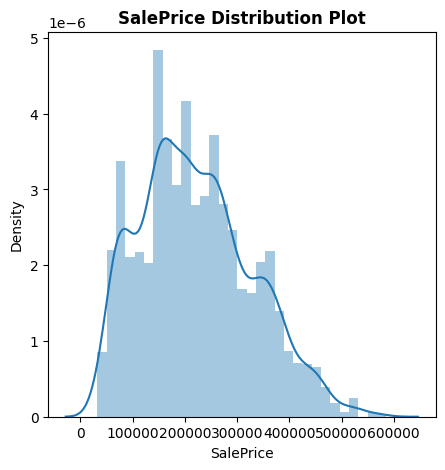

In [9]:
# Plot distribusi fitur 'SalePrice'
plt.figure(figsize=(5, 5))
sns.distplot(df['SalePrice'])
plt.title('SalePrice Distribution Plot',weight='bold')
plt.show()

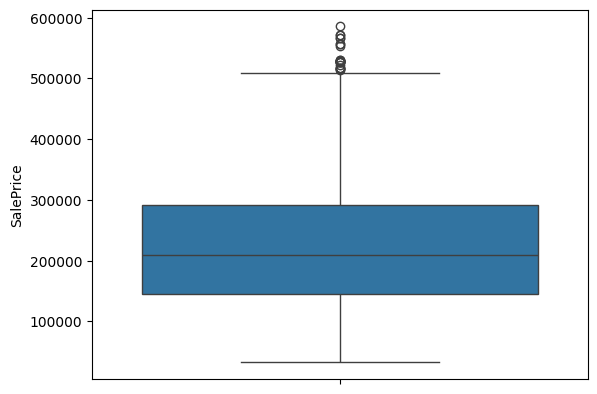

In [10]:
# Checking outliers on the target
sns.boxplot(df['SalePrice'])
plt.show()

In [11]:
stat, p_value = shapiro(df['SalePrice'])
print('Statistic:', stat)
print('p-value:', p_value)

if p_value > 0.05:
    print('Data Target is Normal')
else:
    print('Data Target is not Normal')

Statistic: 0.9755796790122986
p-value: 5.1452962586462643e-26
Data Target is not Normal


- Based on shapiro calculation and the graph, we can see that the target feature, sale price is not normal.
- Additionaly, there'are outliers in the target that we need to handle in data preprocessing stage

## 4.2 Distribution Numerical Features

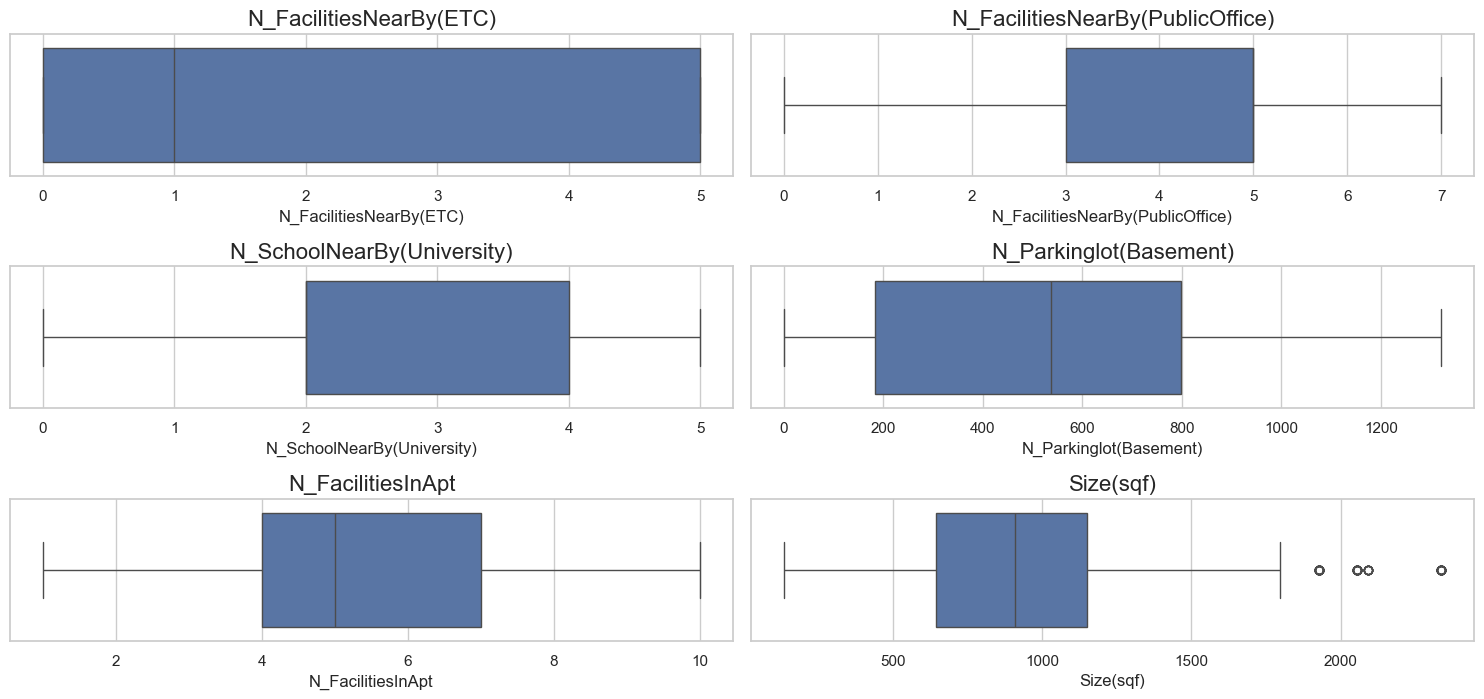

In [12]:
numeric_features = ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'N_FacilitiesInApt', 'Size(sqf)']
# Plot distribution 
plt.figure(figsize=(15, 9))
sns.set(style='whitegrid')
plotnumber = 1
    
for feature in  numeric_features:
    ax = plt.subplot(4,2, plotnumber)
    sns.boxplot(x=feature, data=df)
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1

In [13]:
# define alpha value
alpha = 0.05
index = 1

dist_info = []
for col in numeric_features:
    stat, p_value = shapiro(df[col].dropna())

    if p_value > alpha:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    skewness = df[col].skew()
    
    if skewness > 0:
        skewness_type = "Right Skew"
    else:
        skewness_type = "Left Skew"
    
    dist_info.append([col, stat, p_value, distribution, skewness, skewness_type])

# make dataframe from the results
distribution_info = pd.DataFrame(dist_info, columns=["Feature", 
                                                     "Shapiro Statistic", 
                                                     "P-value", 
                                                     "Distribution", 
                                                     "Skewness",
                                                     "Skewness Type"])
distribution_info

,Feature,Shapiro Statistic,P-value,Distribution,Skewness,Skewness Type
0,N_FacilitiesNearBy(ETC),0.715673,0.000000e+00,Not Normally Distributed,0.568429,Right Skew
1,N_FacilitiesNearBy(PublicOffice),0.933315,1.576985e-39,Not Normally Distributed,-0.173557,Left Skew
2,N_SchoolNearBy(University),0.878251,0.000000e+00,Not Normally Distributed,0.268935,Right Skew
3,N_Parkinglot(Basement),0.921490,5.273086e-42,Not Normally Distributed,0.262595,Right Skew
4,N_FacilitiesInApt,0.905040,5.605194e-45,Not Normally Distributed,0.452692,Right Skew
5,Size(sqf),0.925425,3.237840e-41,Not Normally Distributed,0.875841,Right Skew


The boxplot diagram and statistics calculation indicates that the numerical data in the dataframe don't have normal distribution. Additionally, there's column have outliers. So that, we need to handle it on data preprocessing

## 4.3 Distribution Categorical Feature

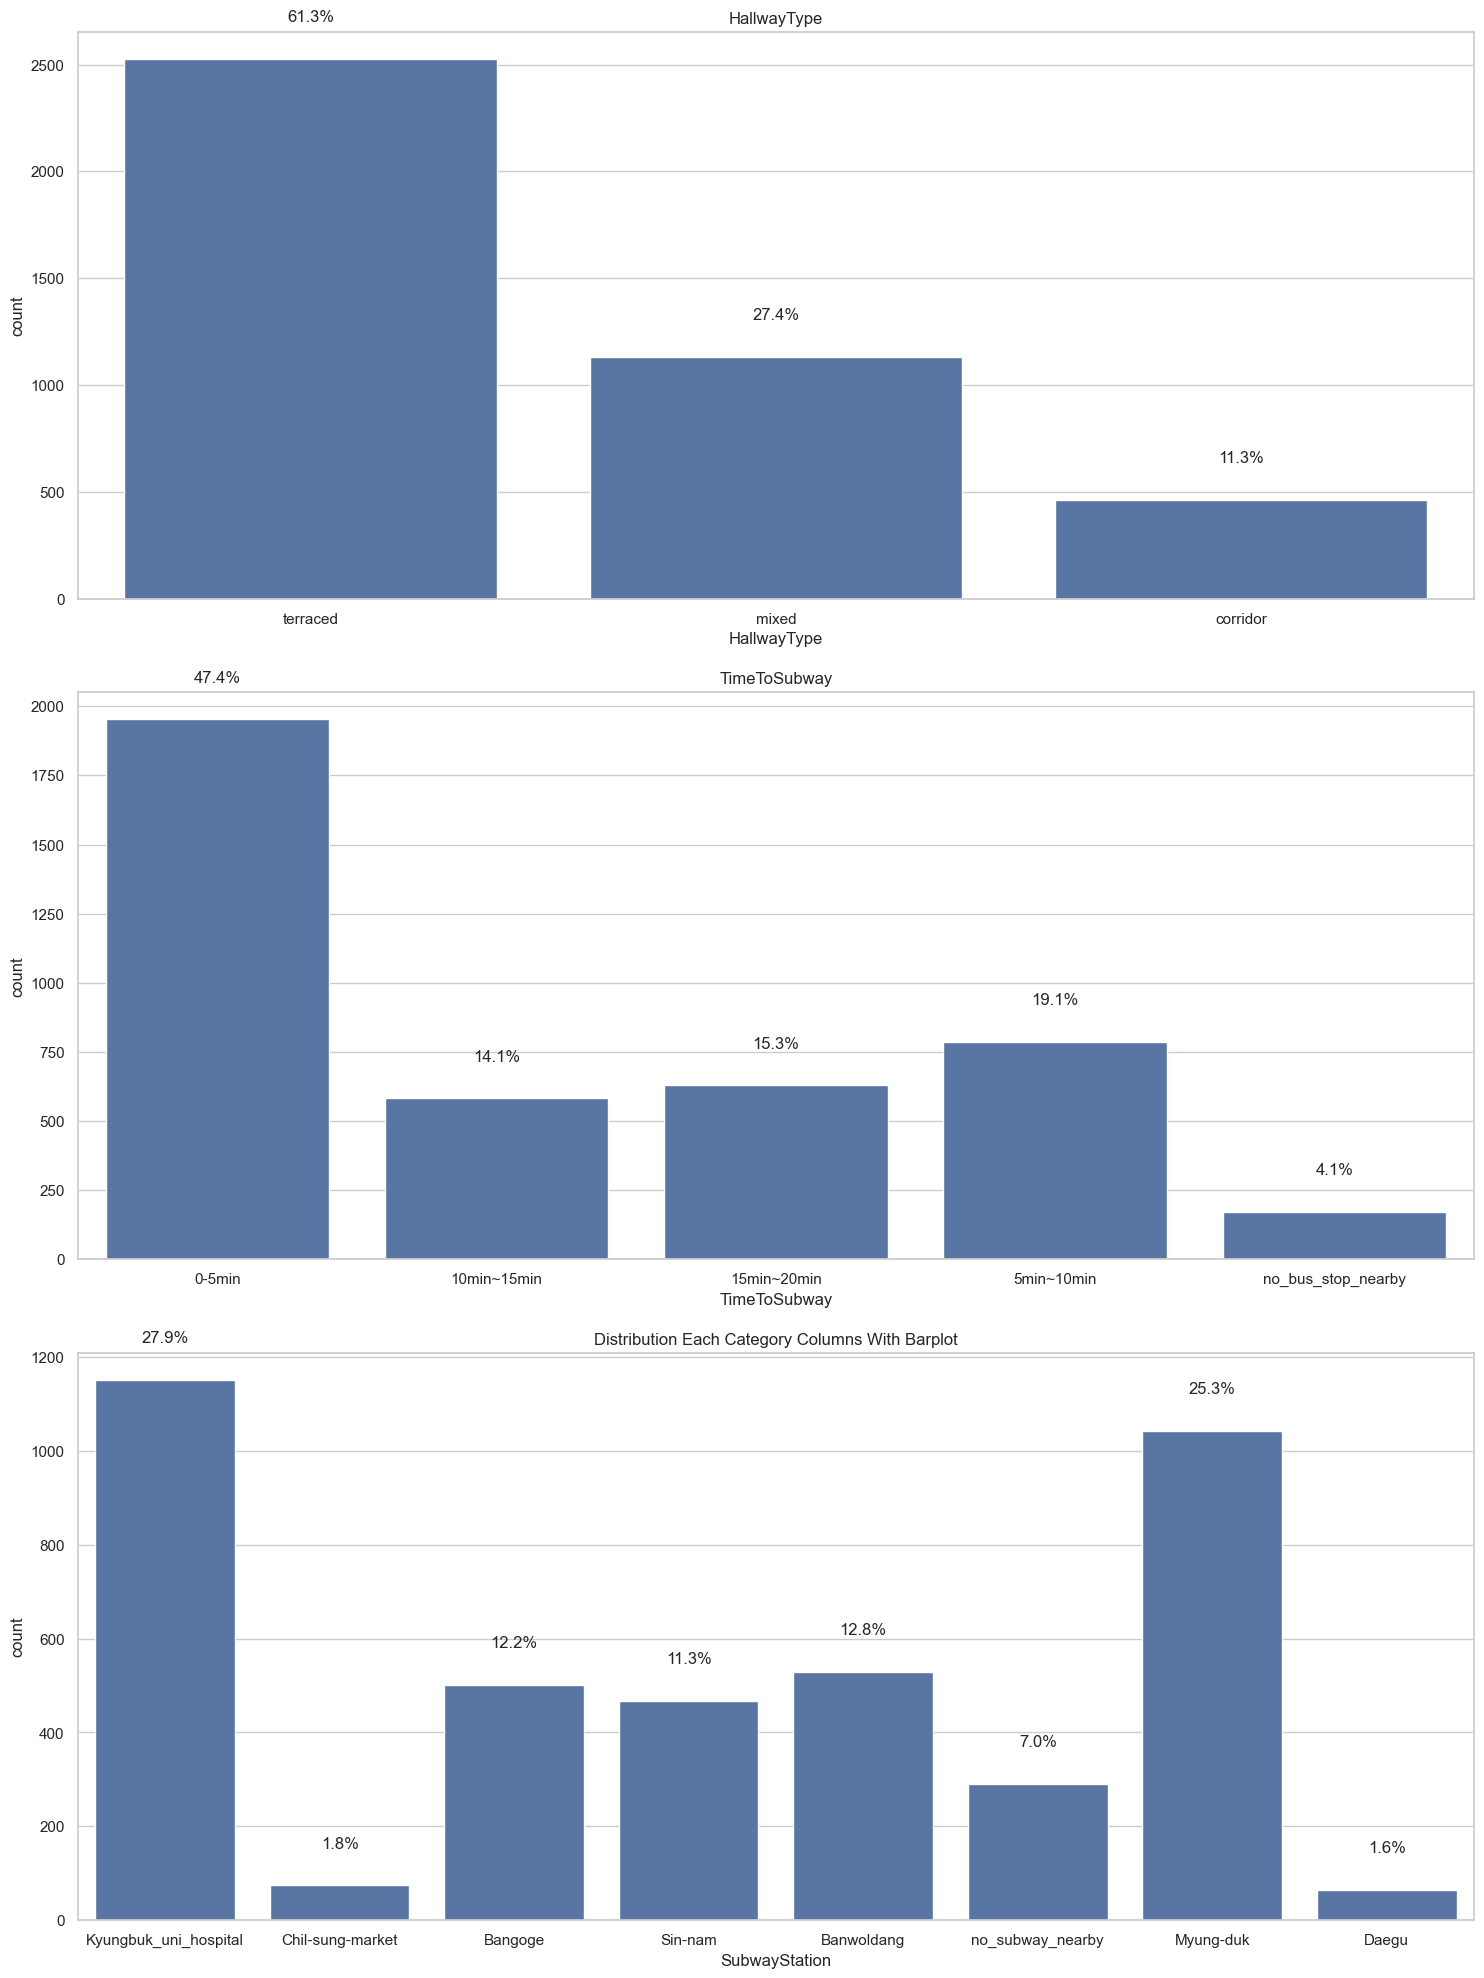

In [14]:
# Show Distribution Category Columns With Barplot
fig, axes = plt.subplots(len(df.select_dtypes(include=['object']).columns), 1, figsize=(15,20))

for i, column in enumerate(df.select_dtypes(include=['object']).columns):
    # Barplot
    ax = sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(column)

    # Calculate the total df points for percentage calculation
    total = len(df[column])
    for p in ax.patches:
        # Calculate percentage
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        # Display the percentage on top of each bar
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 30), 
                     textcoords = 'offset points')

plt.title('Distribution Each Category Columns With Barplot')
plt.tight_layout()
plt.show()

- Most apartment in Daegu gas terraced hallway type
- Most apartment in Daegu is build near to subway
- Most apartment in Daegu close to Kyungbuk Uni Hospital Subway Station

## 4.3 Check Correlation

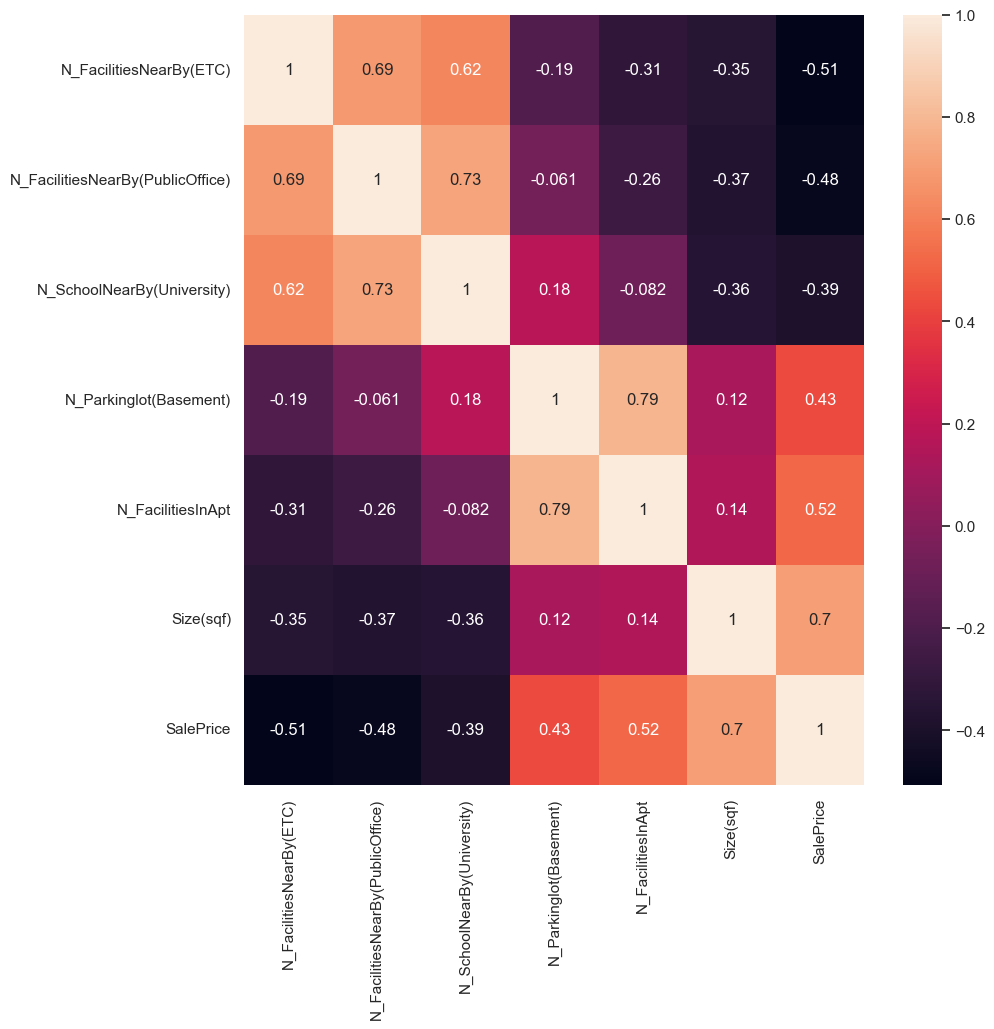

In [15]:
numeric_features = ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice']

plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_features].corr('spearman'), annot=True)
plt.show()

The heatmap indicates a significant positive correlation between the following variables:
- `'University'` with `'PublicOffice'` 
- `'Facilites Apart'` with `'Basement'`
- `'SalePrice'` with `'Size'`

## 4.3 Detect Anomaly

- during the analysis, i found there're an anomaly for about 119 in `TimeToSubway` equal to 5min~10min eventhough value in column `SubwayStation` state no_subway_nearby. So we need to handle it in data preprocessing

In [16]:
# show anomalies data
anomalies = (df['TimeToSubway']=='5min~10min') & (df['SubwayStation']=='no_subway_nearby')
df[anomalies]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
37,corridor,5min~10min,no_subway_nearby,1.0,4.0,1.0,218.0,2014,1,156,57522
39,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,910,391150
44,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,914,411504
83,corridor,5min~10min,no_subway_nearby,1.0,4.0,1.0,218.0,2014,1,135,56637
165,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,644,256637
...,...,...,...,...,...,...,...,...,...,...,...
3818,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,644,256637
3836,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,644,252212
3841,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,910,394690
3886,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,644,269911


## 4.4 Analize Outliers

In [17]:
# Calculate IQR for SalePrice
Q1_saleprice = df['SalePrice'].quantile(0.25)
Q3_saleprice = df['SalePrice'].quantile(0.75)
IQR_saleprice = Q3_saleprice - Q1_saleprice

# Identify outliers in SalePrice
outliers_saleprice = df[((df['SalePrice'] < (Q1_saleprice - 1.5 * IQR_saleprice)) | 
                                (df['SalePrice'] > (Q3_saleprice + 1.5 * IQR_saleprice)))]

# Calculate IQR for Size
Q1_size = df['Size(sqf)'].quantile(0.25)
Q3_size = df['Size(sqf)'].quantile(0.75)
IQR_size = Q3_size - Q1_size

# Identify outliers in Size
outliers_size = df[(df['Size(sqf)'] < (Q1_size - 1.5 * IQR_size)) | 
                           (df['Size(sqf)'] > (Q3_size + 1.5 * IQR_size))]

# Combine outliers
outliers_combined = pd.concat([outliers_saleprice, outliers_size]).drop_duplicates()


### 4.4.1 Outliers in SalePrice

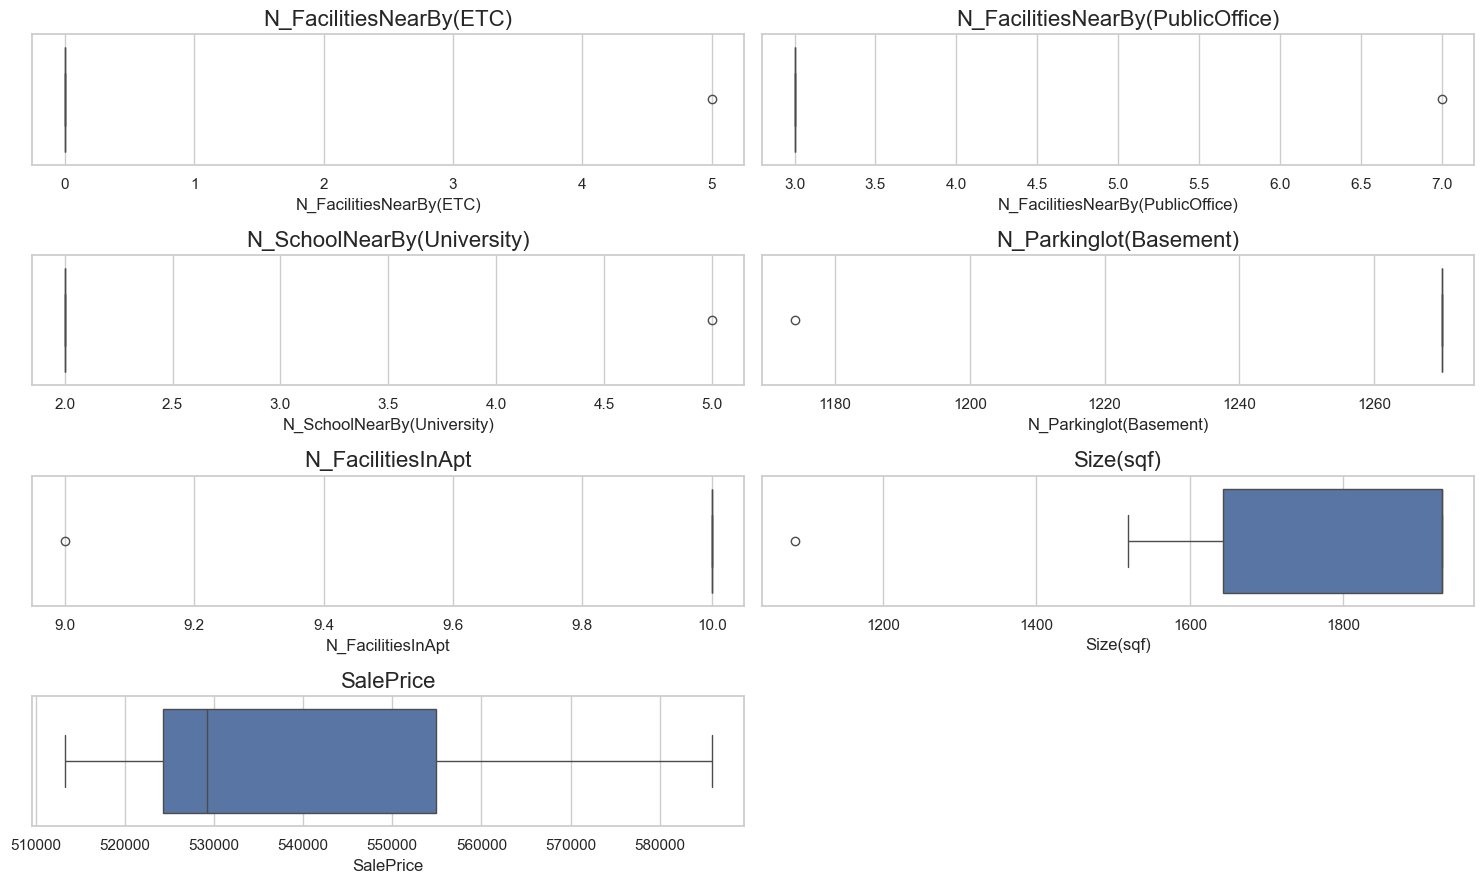

In [18]:
numeric_features = ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'N_FacilitiesInApt', 'Size(sqf)','SalePrice']
# Plot distribution 
plt.figure(figsize=(15, 9))
sns.set(style='whitegrid')
plotnumber = 1
    
for feature in  numeric_features:
    ax = plt.subplot(4,2, plotnumber)
    sns.boxplot(x=feature, data=outliers_saleprice)
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1


In [19]:
outliers_saleprice.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.185185,3.148148,2.111111,1266.444444,2007.259259,9.962963,1792.592593,536610.481481
std,0.962250,0.769800,0.577350,18.475209,1.347151,0.192450,207.432706,20742.608974
min,0.000000,3.000000,2.000000,1174.000000,2007.000000,9.000000,1085.000000,513274.000000
25%,0.000000,3.000000,2.000000,1270.000000,2007.000000,10.000000,1643.000000,524335.500000
50%,0.000000,3.000000,2.000000,1270.000000,2007.000000,10.000000,1928.000000,529203.000000
75%,0.000000,3.000000,2.000000,1270.000000,2007.000000,10.000000,1928.000000,554867.000000
max,5.000000,7.000000,5.000000,1270.000000,2014.000000,10.000000,1928.000000,585840.000000


### 4.4.2 Outleirs in Size

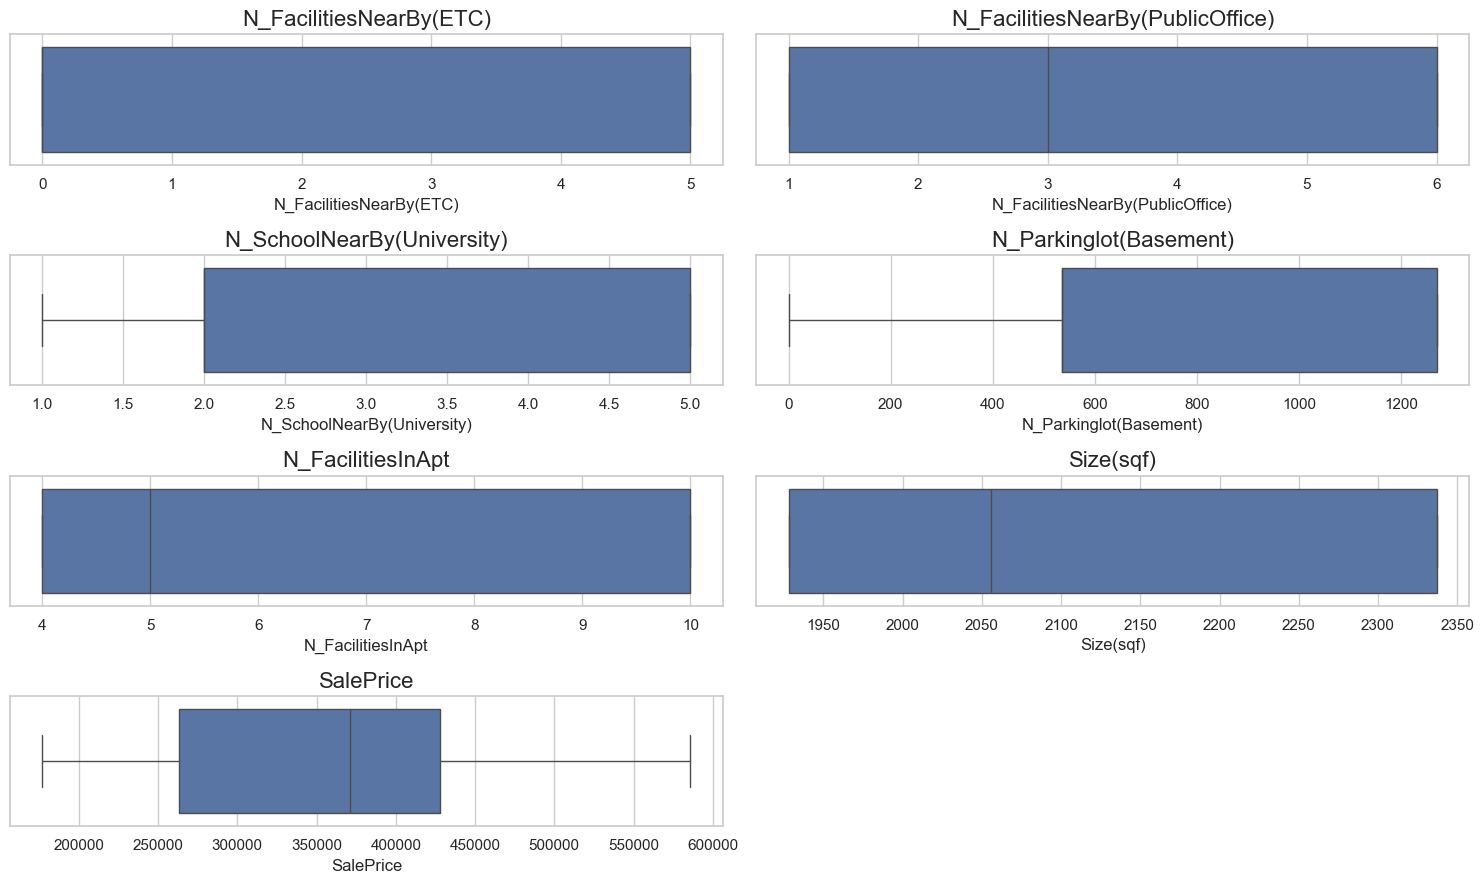

In [20]:
plt.figure(figsize=(15, 9))
sns.set(style='whitegrid')
plotnumber = 1
    
for feature in  numeric_features:
    ax = plt.subplot(4,2, plotnumber)
    sns.boxplot(x=feature, data=outliers_size)
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1

Based on the Boxplot, seem like the outliers is genuine, means that the number of SalePrice is still make sense. This might be a luxury penthouse

# 5. Data Preprocessing

This aim of this step is to make the data ready for modeling by:
- Data Cleaning
    - Change Data Type
    - Handling Inconsistencies
    - Handling Anomaly
    - Handling Missing Values
    - Handling Duplicate
    - Handling Outliers
- Data Transformation
    - Setting ColumnTransformers

In [21]:
categorical_features = ['HallwayType', 'TimeToSubway', 'SubwayStation', 'YearBuilt']
numeric_features= ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'N_FacilitiesInApt', 'Size(sqf)','SalePrice']

## 5.1 Data Cleaning

### 5.1.1 Change Data Type

I noticed a columns number of facilities, school and parking lot was a float (decimal numbers). It seems unlikely that an number of schools would have a fractional number like 3.5 schools. 

So, I changed the data type from float to integer to be more appropriate to ensure the data accurately treated as whole numbers.

In [22]:
# Change data type from float to integer
df['N_FacilitiesNearBy(ETC)'] = df['N_FacilitiesNearBy(ETC)'].astype('int64')
df['N_FacilitiesNearBy(PublicOffice)'] = df['N_FacilitiesNearBy(PublicOffice)'].astype('int64')
df['N_SchoolNearBy(University)'] = df['N_SchoolNearBy(University)'].astype('int64')
df['N_Parkinglot(Basement)'] = df['N_Parkinglot(Basement)'].astype('int64')

### 5.1.2 Handling Inconsistency

Since i observed inconsistencies in the format category like 
- The category followed the format 'X~Ymin' (e.g., '10~15min'), others used a hyphen without a space ('0-5min').
- Mislabeling in category no_bus_stop_nearby that should by no_subway_nearby

I decided to standardize the format across all categories to become 0~5min and no_subway_nearby for consistency and clarity

Inconsistent data can lead to faulty analysis, untrustworthy outcomes, and data management challenges. Ensuring data consistency is essential for reliable insights and accurate predictions [(Geekforgeeks)](https://www.geeksforgeeks.org/handling-inconsistent-data/)

In [23]:
# rename category in 'TimeToSubway'
df.loc[df['TimeToSubway'] == '0-5min', 'TimeToSubway']='0~5min'
df.loc[df['TimeToSubway'] == 'no_bus_stop_nearby', 'TimeToSubway']='no_subway_nearby'

### 5.1.3 Handling Anomaly

During the analysis of the 'TimeToSubway' and 'SubwayStation' columns, I identified a potential inconsistency. There were approximately 119 entries where the 'TimeToSubway' value indicated 5~10 minutes, while the corresponding entry in 'SubwayStation' stated 'no_subway_nearby. 

One approach would be to directly change the 'TimeToSubway' value for these 119 entries to 'no_subway_nearby' to ensure consistency with the 'SubwayStation' information.

In [24]:
df.loc[(df['TimeToSubway'] == '5min~10min') & (df['SubwayStation'] == 'no_subway_nearby'), 'TimeToSubway'] = 'no_subway_nearby'


### 5.1.4 Handling Missing Values

Since there's no missing value, we can skip this step

### 5.1.5 Handling Duplicate

In [25]:
df.duplicated().sum()

1422

- Upon checking for duplicates, I found that there are 1422 duplicate rows. Since there is no unique identifier or primary key in the dataset, and considering that duplication is possible in real-world scenarios (e.g., identical apartments units), I decided to retain the duplicate rows. This helps to keep the dataset representative of the actual market conditions.

### 5.1.6 Handling Outliers

In [26]:
# Calculate IQR
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers

df_cleaned = df[~outliers]

# Validate removal
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

Original dataset shape: (4123, 11)
Cleaned dataset shape: (4015, 11)


In [27]:
df_cleaned['SalePrice'].describe()

count      4015.000000
mean     217551.669988
std      103126.367493
min       32743.000000
25%      143362.000000
50%      207079.000000
75%      285840.000000
max      508849.000000
Name: SalePrice, dtype: float64

I identified and removed outliers from the dataset, reducing the dataset size from 4123 to 4015. This helps in improving the model performance by reducing noise and potential biases caused by extreme values. 

In [28]:
df_cleaned.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000,4015.000000
mean,1.943462,4.152677,2.745953,562.914321,2003.040100,5.794521,925.216936,217551.669988
std,2.197190,1.796679,1.498785,408.514456,8.937815,2.323784,341.828592,103126.367493
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,143362.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,207079.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1131.000000,285840.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,1796.000000,508849.000000


## 5.2 Data Transformation (ColumnTransformer)

For data transformation, I employed ColumnTransformer from scikit-learn. This powerful tool allows us to apply different preprocessing techniques to specific columns or groups of columns in the data.

In this case, I created two separate pipelines within the ColumnTransformer to cater to the specific needs of the two models I planned to use:
- **Preprocessor for Tree-based Model**: The first pipeline included a one-hot encoder for categorical features. This is because tree-based models like decision trees can handle categorical features well after they've been converted into numerical one-hot encoded representations.

- **Preprocessor for Linear Model**: The second pipeline included one-hot encoding for categorical features again, but it also incorporated additional preprocessing steps suitable for linear models:
    - Polynomial Feature Generation: This step can potentially capture non-linear relationships between features, which can be beneficial for linear models.
    - StandardScaler: Standard scaling normalizes the numerical features to a common range. This can improve the performance of linear models by ensuring all features contribute equally during training



In [29]:
categorical_features = ['TimeToSubway','HallwayType', 'SubwayStation', 'YearBuilt']
numeric_features = ['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_Parkinglot(Basement)','N_SchoolNearBy(University)', 'N_FacilitiesInApt', 'Size(sqf)']

# Define the column transformer with one-hot encoding for tree based model
preprocessor_tree = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)],
        remainder='passthrough')

# Define the column transformer with polynomial feature, one-hot, standard scaler and k-bin
preprocessor_linear = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),  # drop first
        ('poly', Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                           ('scale', StandardScaler())]), numeric_features) 
    ],
    remainder='passthrough')


By using separate pipelines within the ColumnTransformer, we can tailor the preprocessing steps to the specific requirements of each model, potentially leading to better overall performance

# 6. Modeling

To identify the best model for predicting apartment prices, I performed a benchmarking process that compared several regression models.

The models I evaluated included 
| Model                      | Description                                                                                                            |
|----------------------------|------------------------------------------------------------------------------------------------------------------------|
| Lasso Regression           | Lasso (Least Absolute Shrinkage and Selection Operator) Regression performs L1 regularization, which can shrink some coefficients to zero, thus performing variable selection and regularization simultaneously. This helps in handling multicollinearity and reducing the complexity of the model. |
| Ridge Regression           | Ridge Regression applies L2 regularization, which penalizes the size of the coefficients. This model helps to prevent overfitting by shrinking the coefficients, but unlike Lasso, it does not set any coefficients to zero. It's useful when dealing with multicollinearity. |
| Random Forest Regression   | An ensemble learning method that constructs multiple decision trees during training and outputs the average of the predictions of the individual trees. It reduces overfitting and improves accuracy by combining the predictions of several trees. |
| XGBoost Regression         | Extreme Gradient Boosting (XGBoost) is an optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost uses a more regularized model formalization to control overfitting, leading to better performance. |
| Decision Tree Regression   | A non-linear regression model that splits the data into subsets based on feature values. It constructs a tree where each node represents a feature, each branch represents a decision rule, and each leaf represents an outcome. It can capture non-linear relationships but is prone to overfitting. |
| Extra Trees Regression     | Extra Trees (Extremely Randomized Trees) Regression is similar to Random Forest but differs in how the trees are constructed. Extra Trees use the whole dataset and randomly select the cut points for each feature. This results in more variability and can reduce overfitting. |
| Stacking Regressor         | Stacking Regressor is an ensemble learning technique that combines multiple regression models (base models) to improve predictive performance. A meta-model is trained on the predictions of the base models to provide a final prediction. It leverages the strengths of multiple algorithms. This is combination between Linear Regression, Ridge, Lasso, and Random Forest |
| Ordinary Least Squares (OLS) Regression | OLS Regression is a method for estimating the unknown parameters in a linear regression model. It minimizes the sum of the squared differences between observed


In addition to benchmarking different models, I also employed feature selection to potentially improve model performance and interpretability.

In this case, I used the f-test with SelectKBest. The F-test assesses the statistical significance of each feature by comparing the explained variance to the unexplained variance. This helps in identifying features that are truly relevant and not just correlated with the target variable [(Machine Learning Mastery)](https://machinelearningmastery.com/feature-selection-with-numerical-input-data/)

I set the number of features to select (k) to 7. This value was chosen based on performance analysis of the models with different feature sets

By selecting the most relevant features, we can potentially reduce model complexity, improve training efficiency, and sometimes even enhance model accuracy

In [30]:
# Split the data
X = df_cleaned.drop('SalePrice', axis=1)
y = df_cleaned['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)


## 6.1 Model Benchmarking

To assess the performance of each model, I used two key evaluation metrics:**Root Mean Squared Error (RMSE)** and **Adjusted R-squared**
- RMSE measures the average difference between predicted and actual prices. (Lower RMSE is better)

- Adjusted R-squared indicates how well the model explains the variance in apartment prices, adjusted for the number of features in the model. (Higher adjusted R-squared is better)

### 6.1.1 Modeling Lasso, Ridge, RF, XGB, ET, DT

We will use pipeline to avoid data leakage. This also help in maintain the model

In [31]:
# Define pipelines for different models
pipelines = {
    'Lasso': Pipeline(steps=[
        ('preprocessor', preprocessor_linear), 
        ('feature_selection', SelectKBest(score_func=f_regression, k=7)), 
        ('regressor', Lasso(random_state=5))]),

    'Ridge': Pipeline(steps=[
        ('preprocessor', preprocessor_linear), 
        ('feature_selection', SelectKBest(score_func=f_regression, k=7)), 
        ('regressor', Ridge(random_state=5))]),

    'Random Forest': Pipeline(steps=[
        ('preprocessor', preprocessor_tree), 
        ('feature_selection', SelectKBest(score_func=f_regression, k=7)), 
        ('regressor', RandomForestRegressor(random_state=5))]),

    'Extreme Gradient Boosting': Pipeline(steps=[
        ('preprocessor', preprocessor_tree), 
        ('feature_selection', SelectKBest(score_func=f_regression, k=7)), 
        ('regressor', XGBRegressor(random_state=5))]),

    'Decision Tree': Pipeline(steps=[
        ('preprocessor', preprocessor_tree), 
        ('feature_selection', SelectKBest(score_func=f_regression, k=7)), 
        ('regressor', DecisionTreeRegressor(random_state=5))]),

    'Extra Tree': Pipeline(steps=[
        ('preprocessor', preprocessor_tree), 
        ('feature_selection', SelectKBest(score_func=f_regression, k=7)), 
        ('regressor', ExtraTreesRegressor(random_state=5))])

}


In [32]:
# Assuming X_train and X_test are your training and test datasets
n_train = X_train.shape[0]
k = X_train.shape[1]
n_test = X_test.shape[0]

# Dictionary to store results
results = []

# Train and evaluate each model
for name, pipeline in pipelines.items():
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predict on training set
    y_train_pred = pipeline.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)
    adjusted_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - k - 1)

    # Predict on test set
    y_test_pred = pipeline.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    adjusted_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - k - 1)

    # Calculate difference
    difference = rmse_test - rmse_train

    # Store the results
    results.append({
        'Name': name,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'Difference RMSE': difference,
        'Adjusted R² Train': adjusted_r2_train,
        'Adjusted R² Test': adjusted_r2_test
    })


In [33]:
pd.DataFrame(results).sort_values(by='RMSE Test', ascending=True)

,Name,RMSE Train,RMSE Test,Difference RMSE,Adjusted R² Train,Adjusted R² Test
2,Random Forest,41507.715511,41693.168685,185.453174,0.836496,0.838100
3,Extreme Gradient Boosting,41397.744067,41795.898826,398.154758,0.837361,0.837301
5,Extra Tree,41397.742935,41823.283383,425.540448,0.837361,0.837088
4,Decision Tree,41397.742935,41827.258233,429.515298,0.837361,0.837057
0,Lasso,53296.783053,54062.456505,765.673452,0.730429,0.727787
1,Ridge,53296.913601,54069.607304,772.693703,0.730427,0.727715


### 6.1.2 Model Stacking

This model stacking include 

**BASE MODELS**

- **Linear Regression, Ridge, Lasso**: These models capture different aspects of linear relationships and regularization, which helps in dealing with multicollinearity and feature selection.
- **Random Forest**: This model captures non-linear relationships and interactions between features.

**META-MODEL**
- **Linear Regression:** It provides a simple, interpretable way to combine the predictions of the base models. This helps avoid overfitting and ensures that the final model remains easy to understand.



In [34]:
# Make predictions using the base models for data train 
base_model1 = Pipeline([('preprocessor', preprocessor_linear),('regressor', LinearRegression())])
base_model2 = Pipeline([('preprocessor', preprocessor_linear), ('regressor', Ridge(random_state=0))])
base_model3 =  Pipeline([('preprocessor', preprocessor_linear), ('regressor', Lasso(random_state=0))])
base_model4 =  Pipeline([('preprocessor', preprocessor_tree), ('regressor', RandomForestRegressor(random_state=0))])

# Train the base models
base_model1.fit(X_train, y_train)
base_model2.fit(X_train, y_train)
base_model3.fit(X_train, y_train)
base_model4.fit(X_train, y_train)

# Make prediction using the base model for X_train
pred1_train = base_model1.predict(X_train)
pred2_train = base_model2.predict(X_train)
pred3_train = base_model3.predict(X_train)
pred4_train = base_model4.predict(X_train)

# Create a meta-dataset using base model predictions
meta_X_train = np.column_stack((pred1_train, pred2_train, pred3_train, pred4_train))

meta_model = LinearRegression()
meta_model.fit(meta_X_train, y_train)

# Make final predictions using the stacked model
stacked_pred_initial_train = meta_model.predict(meta_X_train)

# Calculate MAE for the stacked model
stacked_mae_initial_train = mean_absolute_error(y_train, stacked_pred_initial_train)

# Calculate MSE for the stacked model
stacked_mse_initial_train = mean_squared_error(y_train, stacked_pred_initial_train)

# Calculate RMSE for the stacked model
stacked_rmse_initial_train = np.sqrt(mean_squared_error(y_train, stacked_pred_initial_train))

# Calculate MAPE for the stacked model
stacked_mape_initial_train = np.mean(np.abs((y_train - stacked_pred_initial_train) / y_train)) * 100

# Calculate RMSPE for the stacked model
stacked_rmspe_initial_train = np.sqrt(np.mean(np.square((y_train - stacked_pred_initial_train) / y_train))) * 100

# Calculate r2 for the stacked model
r2_test_initial_stacking_train = r2_score(y_train, stacked_pred_initial_train)

# Calculate Adjusted R2
adjusted_r2_initial_stacking_train = 1 - (1 - r2_test_initial_stacking_train) * (len(y_train) - 1) / (len(y_train) - meta_X_train.shape[1] - 1)

# Print evaluation metrics
print(f"Stacked Model MAE: {stacked_mae_initial_train}")
print(f"Stacked Model MSE: {stacked_mse_initial_train}")
print(f"Stacked Model RMSE: {stacked_rmse_initial_train}")
print(f"Stacked Model MAPE: {stacked_mape_initial_train}")
print(f"Stacked Model RMSPE: {stacked_rmspe_initial_train}")
print(f"Adjusted R^2 Initial: {adjusted_r2_initial_stacking_train}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.903e+12, tolerance: 3.395e+09
  model = cd_fast.enet_coordinate_descent(


Stacked Model MAE: 32288.909622021623
Stacked Model MSE: 1671306341.4751828
Stacked Model RMSE: 40881.613733745675
Stacked Model MAPE: 17.703913408210468
Stacked Model RMSPE: 22.68492327653294
Adjusted R^2 Initial: 0.8416876837303068


In [35]:
# Make predictions using the base models for data test
pred1_test = base_model1.predict(X_test)
pred2_test = base_model2.predict(X_test)
pred3_test = base_model3.predict(X_test)
pred4_test = base_model4.predict(X_test)

# Calculate RMSE for each base model
rmse_base_model1 = np.sqrt(mean_squared_error(y_test, pred1_test))
rmse_base_model2 = np.sqrt(mean_squared_error(y_test, pred2_test))
rmse_base_model3 = np.sqrt(mean_squared_error(y_test, pred3_test))
rmse_base_model4 = np.sqrt(mean_squared_error(y_test, pred4_test))

# Calculate RMSPE for each base model
rmspe_base_model1 = np.sqrt(np.mean(np.square((y_test - pred1_test) / y_test))) * 100
rmspe_base_model2 = np.sqrt(np.mean(np.square((y_test - pred2_test) / y_test))) * 100
rmspe_base_model3 = np.sqrt(np.mean(np.square((y_test - pred3_test) / y_test))) * 100
rmspe_base_model4 = np.sqrt(np.mean(np.square((y_test - pred4_test) / y_test))) * 100

# Create a meta-dataset using base model predictions
meta_X_test = np.column_stack((pred1_test, pred2_test, pred3_test, pred4_test))

# Fit the meta model on the test set predictions
meta_model.fit(meta_X_test, y_test)

# Make final predictions using the stacked model
stacked_pred_initial_test = meta_model.predict(meta_X_test)

# Calculate RMSE for the stacked model
stacked_rmse_initial_test = np.sqrt(mean_squared_error(y_test, stacked_pred_initial_test))

# Calculate RMSPE for the stacked model
stacked_rmspe_initial_test = np.sqrt(np.mean(np.square((y_test - stacked_pred_initial_test) / y_test))) * 100

# Calculate r2 for the stacked model
r2_test_initial_test_stacking = r2_score(y_test, stacked_pred_initial_test)

# Calculate Adjusted R2
adjusted_r2_initial_test_stacking = 1 - (1 - r2_test_initial_test_stacking) * (len(y_test) - 1) / (len(y_test) - meta_X_test.shape[1] - 1)

# # Print RMSE and RMSPE results for base models
# print(f"Base Model 1 RMSE: {rmse_base_model1}")
# print(f"Base Model 1 RMSPE: {rmspe_base_model1}")
# print(f"Base Model 2 RMSE: {rmse_base_model2}")
# print(f"Base Model 2 RMSPE: {rmspe_base_model2}")
# print(f"Base Model 3 RMSE: {rmse_base_model3}")
# print(f"Base Model 3 RMSPE: {rmspe_base_model3}")
# print(f"Base Model 4 RMSE: {rmse_base_model4}")
# print(f"Base Model 4 RMSPE: {rmspe_base_model4}")

# Print RMSE, RMSPE, and Adjusted R2 for the stacked model
print(f"Stacked Model RMSE: {stacked_rmse_initial_test}")
print(f"Stacked Model RMSPE: {stacked_rmspe_initial_test}")
print(f"Adjusted R^2 Initial_test: {adjusted_r2_initial_test_stacking}")


Stacked Model RMSE: 41205.447534776205
Stacked Model RMSPE: 22.800072141782028
Adjusted R^2 Initial_test: 0.8430545588444152


In [36]:
results.append({
        'Name': 'Stacking Regressor',
        'RMSE Train': stacked_rmse_initial_train,
        'RMSE Test': stacked_rmse_initial_test,
        'Difference RMSE': stacked_rmse_initial_train-stacked_rmse_initial_test,
        'Adjusted R² Train': adjusted_r2_initial_stacking_train,
        'Adjusted R² Test': adjusted_r2_initial_test_stacking
    })

### 6.1.3 Model OLS (Linear Regression)

In OLS Model, I addressed potential multicollinearity among features. This is where features have high correlations and can mislead models. I used techniques like correlation analysis and feature selection to identify and potentially remove redundant features

I calculate Variance Inflation Factor (VIF) with threshold 5 to avoid multicolinearity. By addressing multicollinearity, we can improve the stability and interpretability of the models

In [37]:
df_OLS = df_cleaned.copy()

In [38]:
scaler = StandardScaler()

df_dummy = pd.get_dummies(df_OLS, drop_first = True, columns = categorical_features)*1
df_dummy[numeric_features] = scaler.fit_transform(df_dummy[numeric_features])

In [39]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns 
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [40]:
features = [ 'N_FacilitiesNearBy(ETC)',
    'N_FacilitiesNearBy(PublicOffice)',
    'N_FacilitiesInApt', 
    'Size(sqf)', 
    'HallwayType_terraced',
    'TimeToSubway_15min~20min',
    'SubwayStation_Banwoldang',
    'SubwayStation_Daegu',
    'SubwayStation_no_subway_nearby',
    'YearBuilt_1980',
    'YearBuilt_1985',
    'YearBuilt_2008',
    'YearBuilt_2014']


In [41]:
calc_vif(df_dummy[features])

,variables,VIF
0,N_FacilitiesNearBy(ETC),2.299004
1,N_FacilitiesNearBy(PublicOffice),2.584662
2,N_FacilitiesInApt,1.543051
3,Size(sqf),1.535585
4,HallwayType_terraced,2.106184
5,TimeToSubway_15min~20min,1.405937
6,SubwayStation_Banwoldang,1.813034
7,SubwayStation_Daegu,4.716866
8,SubwayStation_no_subway_nearby,1.457563
9,YearBuilt_1980,1.012285


In [42]:
target = 'SalePrice' 
X_ols = df_dummy[features]
y_ols = df_dummy[target]

# Split the data into training and testing sets
X_train_ols, X_test_ols, y_train_ols, y_test_ols = train_test_split(X_ols, y_ols,test_size=0.2, random_state=42)


sm_lm = sm.OLS(y_train_ols, sm.add_constant(X_train_ols))
result = sm_lm.fit()

In [43]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     802.8
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:42:46   Log-Likelihood:                -39297.
No. Observations:                3212   AIC:                         7.862e+04
Df Residuals:                    3198   BIC:                         7.871e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [44]:
# Predict on the training set
y_train_pred_ols = result.predict(sm.add_constant(X_train_ols))
rmse_train_ols = np.sqrt(mean_squared_error(y_train_ols, y_train_pred_ols))
r2_train_ols = r2_score(y_train_ols, y_train_pred_ols)
adjusted_r2_train_ols = 1 - (1 - r2_train_ols) * (X_train_ols.shape[0] - 1) / (X_train_ols.shape[0] - X_train_ols.shape[1] - 1)

# Predict on the test set
y_test_pred_ols = result.predict(sm.add_constant(X_test_ols))
rmse_test_ols = np.sqrt(mean_squared_error(y_test_ols, y_test_pred_ols))
r2_test_ols = r2_score(y_test_ols, y_test_pred_ols)
adjusted_r2_test_ols = 1 - (1 - r2_test_ols) * (X_test_ols.shape[0] - 1) / (X_test_ols.shape[0] - X_test_ols.shape[1] - 1)

# Calculate the difference
difference_ols = rmse_test_ols - rmse_train_ols

# Append results
results.append({
    'Name': 'OLS',
    'RMSE Train': rmse_train_ols,
    'RMSE Test': rmse_test_ols,
    'Difference RMSE': difference_ols,
    'Adjusted R² Train': adjusted_r2_train_ols,
    'Adjusted R² Test': adjusted_r2_test_ols
})


#### Checking Assumption

/var/folders/l8/x2bmf0056fd1z45stmms96640000gp/T/ipykernel_41777/1439049489.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result.resid)


Text(0.5, 0, 'Residuals')

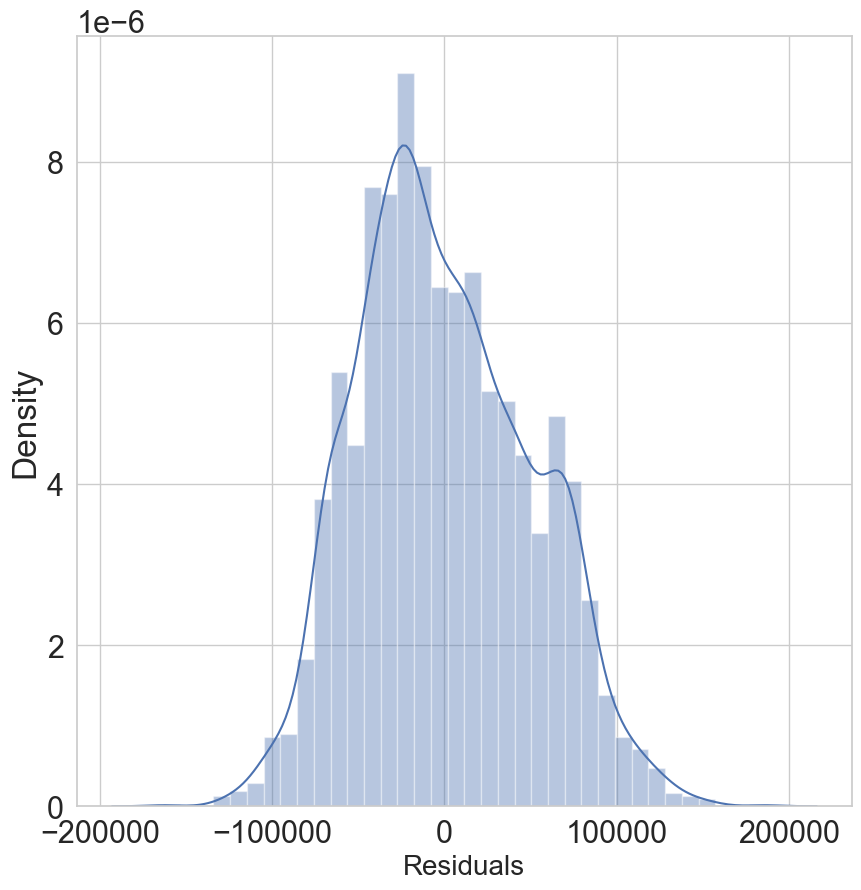

In [45]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.distplot(result.resid)
plt.xlabel('Residuals', fontsize = 20)

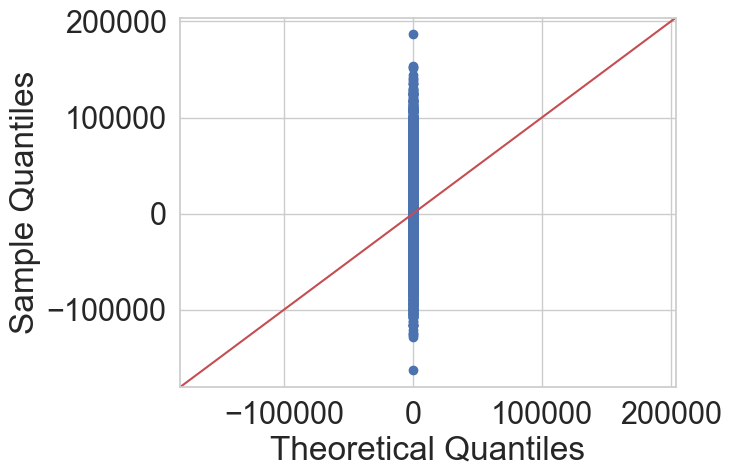

In [46]:
sm.qqplot(result.resid, line = '45')
plt.show()

Text(0, 0.5, 'Residuals')

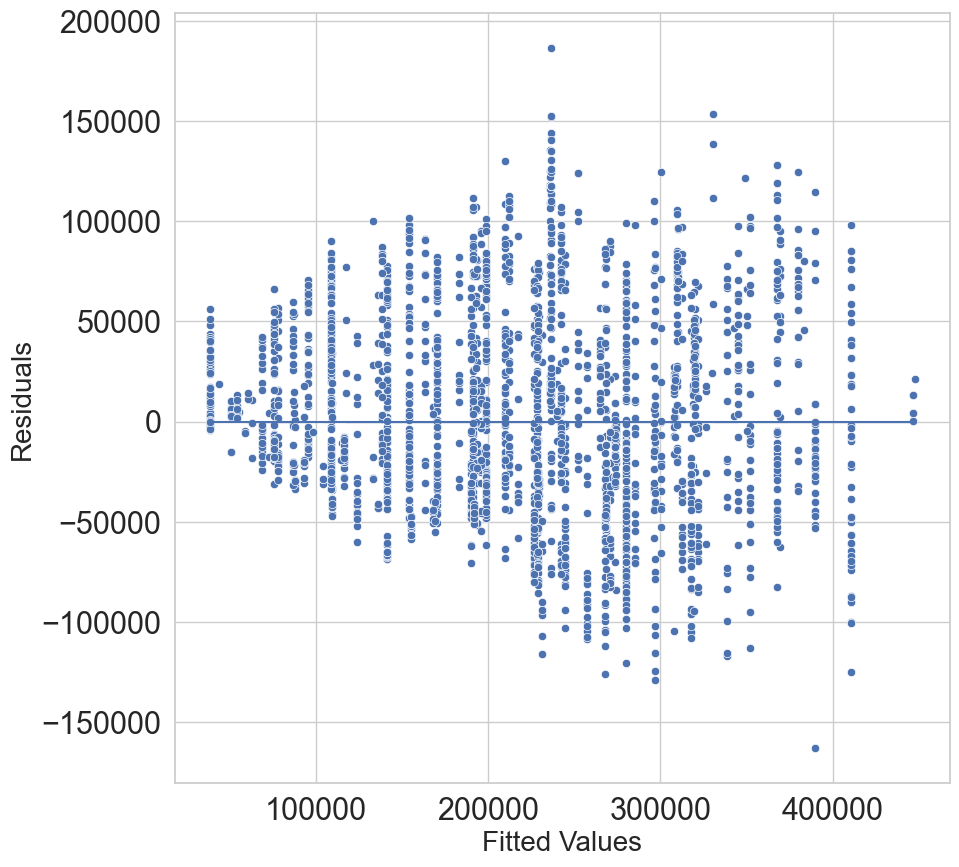

In [47]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.scatterplot(x=result.fittedvalues,y=result.resid)
sns.lineplot(x=result.fittedvalues,y=0)
plt.xlabel('Fitted Values', fontsize = 20)
plt.ylabel('Residuals', fontsize = 20)

Based the observation, we can evaluate wheter the assumption is met or not on this model.
 

1. Residual Distribution: The residuals appear to be symmetrically distributed around zero, which suggests that the residuals may follow a normal distribution.

2. QQ Plot: The points do not lie along the red line, indicating that the residuals deviate from normality. This suggests that there might be skewness or kurtosis in the residuals, or the presence of outliers. **(Not normal distribution)**

3. Homoscedasticity: There is no clear pattern in the residuals, which suggests homoscedasticity (constant variance of residuals). However, some spread and clustering at certain points might indicate mild heteroscedasticity.

4. Multicolinearity: No indicate multicolinearity since we have been delete using VIF

Instead of low metrics evaluation, we can deny this model because did not met model assumption of linear regression


### 6.1.4 Comparing Each Model

In [48]:
# Create DataFrame
results_df = pd.DataFrame(results).sort_values(by='RMSE Test', ascending=True)
results_df

,Name,RMSE Train,RMSE Test,Difference RMSE,Adjusted R² Train,Adjusted R² Test
6,Stacking Regressor,40881.613734,41205.447535,-323.833801,0.841688,0.843055
2,Random Forest,41507.715511,41693.168685,185.453174,0.836496,0.838100
3,Extreme Gradient Boosting,41397.744067,41795.898826,398.154758,0.837361,0.837301
5,Extra Tree,41397.742935,41823.283383,425.540448,0.837361,0.837088
4,Decision Tree,41397.742935,41827.258233,429.515298,0.837361,0.837057
7,OLS,49791.832159,50581.716567,789.884408,0.764498,0.760805
0,Lasso,53296.783053,54062.456505,765.673452,0.730429,0.727787
1,Ridge,53296.913601,54069.607304,772.693703,0.730427,0.727715


Based on the evaluation results, the model with the lowest RMSE and highest adjusted R-squared was chosen as the best model for predicting apartment prices in Daegu, which are:
- Stacking Regressor
    - Lowest RMSE Test: The Stacking Regressor achieved the lowest RMSE on the test set (41205.4475), indicating it has the best predictive accuracy among the models.
    - High Adjusted R² Test: It also achieved the highest Adjusted R² on the test set (0.843055), suggesting that it explains a high proportion of variance in the target variable.
- Random Forest Regressor
    - Good RMSE Test: The Random Forest model achieved a competitive RMSE on the test set (41693.1687), which is close to that of the Stacking Regressor.
    - High Adjusted R² Test: It also showed a high Adjusted R² on the test set (0.838100), indicating its strong explanatory power.
    - Lowest Difference: The difference is only 185, it suggests that the model is not overfitting and has a good generalization capability
    - Feature Interpretability: Random Forest models provide clear insights into feature importance, which is crucial for understanding the driving factors behind the predictions and making the model more interpretable.R

## 6.2 Hyperparameter Tuning Best Model

Based on the initial model benchmarking using RMSE and adjusted R-squared, I shortlisted two models for further hyperparameter tuning: Stacking Regressor and Random Forest Regressor.
- Stacking Regressor potentially benefits from combining the strengths of multiple models, which could lead to more accurate predictions
- Random Forest Regressor is known for its robustness to outliers and ability to handle complex relationships between features, making it a good candidate for apartment price prediction

Since both Stacking Regressor and Random Forest Regressor have various hyperparameters, I decided to fine-tune them to potentially improve their performance on the Daegu apartment price prediction

### 6.2.1 Random Forest Hyperparameter Tuning

Since Random Forest Regression was one of the top performers in the model benchmarking stage, I focused on hyperparameter tuning to further improve its accuracy

Hyperparameters are settings that control how a machine learning model learns. Unlike model parameters learned from data, hyperparameters need to be set manually before training.

To efficiently explore different hyperparameter combinations, I used GridSearchCV from scikit-learn. GridSearchCV allows us to define a grid of possible values for each hyperparameter and then systematically trains the model with every combination of values in the grid

In this case, I tuned the following hyperparameters for Random Forest Regression:
- n_estimators: This controls the number of decision trees in the forest.
- max_depth: This determines the maximum depth of each individual tree.
- min_samples_split: This defines the minimum number of samples required to split a node into daughter nodes.
- min_samples_leaf: This sets the minimum number of samples required to be at a leaf node.
- bootstrap: This determines whether to use bootstrapping with replacement during tree building

#### 6.2.1.1 Random Forest Initial

In [49]:
# Create a pipeline with feature selection
rf = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('feature_selection', SelectKBest(f_regression, k=7)),
    ('regressor', RandomForestRegressor(random_state=100))
])

# Fit the model
rf.fit(X_train, y_train)

# Predict on training set
y_train_pred_initial_rf = rf.predict(X_train)

# Calculate metrics on train set
mae_train_initial_rf = mean_absolute_error(y_train, y_train_pred_initial_rf)
mape_train_initial_rf = mean_absolute_percentage_error(y_train, y_train_pred_initial_rf)
rmse_train_initial_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_initial_rf))
rmspe_train_initial_rf = np.sqrt(np.mean(np.square((y_train - y_train_pred_initial_rf) / y_train))) * 100
r2_train_initial_rf = r2_score(y_train, y_train_pred_initial_rf)
adjusted_r2_train_initial_rf = 1 - (1 - r2_train_initial_rf) * (len(y_train) - 1) / (len(y_train) - meta_X_test.shape[1] - 1)



# Predict on test set
y_test_pred_initial_rf = rf.predict(X_test)

# Calculate metrics on test set
mae_test_initial_rf = mean_absolute_error(y_test, y_test_pred_initial_rf)
mape_test_initial_rf = mean_absolute_percentage_error(y_test, y_test_pred_initial_rf)
rmse_test_initial_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_initial_rf))
rmspe_test_initial_rf = np.sqrt(np.mean(np.square((y_test - y_test_pred_initial_rf) / y_test))) * 100
r2_test_initial_rf = r2_score(y_test, y_test_pred_initial_rf)
adjusted_r2_test_initial_rf = 1 - (1 - r2_test_initial_rf) * (len(y_test) - 1) / (len(y_test) - meta_X_test.shape[1] - 1)



# Calculate difference
difference = rmse_test_initial_rf - rmse_train_initial_rf

# Print results
print(f"Random Forest RMSE Train: {rmse_train_initial_rf}")
print(f"Random Forest RMSE Test: {rmse_test_initial_rf}")
print(f"Random Forest RMSPE Train: {rmspe_train_initial_rf}")
print(f"Random Forest RMSPE Test: {rmspe_test_initial_rf}")
print(f"Random Forest Difference: {difference}")



Random Forest RMSE Train: 41504.71100357524
Random Forest RMSE Test: 41726.17429389939
Random Forest RMSPE Train: 25.038891382361484
Random Forest RMSPE Test: 23.407701720467283
Random Forest Difference: 221.46329032415088


#### 6.2.1.2 Random Forest Tuned

In [50]:
# # Define the parameter grid
# param_grid = {
#     'regressor__n_estimators': [100, 200, 300],
#     'regressor__max_depth': [None, 10, 20, 30],
#     'regressor__min_samples_split': [2, 5, 10],
#     'regressor__min_samples_leaf': [1, 2, 4],
#     'regressor__bootstrap': [True, False]
# }


In [51]:
# # Perform grid search
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, scoring='neg_mean_absolute_error')
# grid_search.fit(X_train, y_train)

# # Get the best parameters and the best estimator
# best_params = grid_search.best_params_
# best_estimator = grid_search.best_estimator_

# print(f"Best parameters: {best_params}")


After do gridsearch. The Best parameters for Random Forest: 
- 'regressor__bootstrap': False, 
- 'regressor__max_depth': 10, 
- 'regressor__min_samples_leaf': 1, 
- 'regressor__min_samples_split': 10, 
- 'regressor__n_estimators': 200

In [52]:
rf_grid = RandomForestRegressor(
    bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200,random_state=42
)
rf_tuning = Pipeline(steps=[('preprocessor', preprocessor_tree), 
                            ('feature_selection', SelectKBest(f_regression, k=7)),
                            ('regressor', rf_grid),
                            ])

rf_tuning.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['TimeToSubway',
                                                   'HallwayType',
                                                   'SubwayStation',
                                                   'YearBuilt'])])),
                ('feature_selection',
                 SelectKBest(k=7,
                             score_func=<function f_regression at 0x309974d60>)),
                ('regressor',
                 RandomForestRegressor(bootstrap=False, max_depth=10,
                                       min_samples_split=10, n_estimators=200,
                                       random_state=42))])

In [53]:
# Predict on training set using best estimator
y_train_pred_tuning_rf = rf_tuning.predict(X_train)

# Calculate evaluation metrics
mae_train_tuning_rf = mean_absolute_error(y_train, y_train_pred_tuning_rf)
mape_train_tuning_rf = mean_absolute_percentage_error(y_train, y_train_pred_tuning_rf)
rmse_train_tuning_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_tuning_rf))
rmspe_train_tuning_rf = np.sqrt(np.mean(np.square((y_train - y_train_pred_tuning_rf) / y_train))) * 100

# Calculate R2 and Adjusted R2
r2_train_tuning_rf = r2_score(y_train, y_train_pred_tuning_rf)
adjusted_r2_train_tuning_rf = 1 - (1 - r2_train_tuning_rf) * (len(y_train) - 1) / (len(y_train) - X_test.shape[1] - 1)

# Print evaluation metrics
print(f'RMSE Train: {rmse_train_tuning_rf}')
print(f'RMSPE Train: {rmspe_train_tuning_rf}')
print(f'Adjusted R-Squared Train: {adjusted_r2_train_tuning_rf}')

RMSE Train: 41459.08081410183
RMSPE Train: 24.89801141297851
Adjusted R-Squared Train: 0.8368784775435112


In [54]:
# Predict on the test set using the best estimator
y_test_pred_tuning_rf = rf_tuning.predict(X_test)

# Calculate evaluation metrics
mae_test_tuning_rf = mean_absolute_error(y_test, y_test_pred_tuning_rf)
mape_test_tuning_rf = mean_absolute_percentage_error(y_test, y_test_pred_tuning_rf)
rmse_test_tuning_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_tuning_rf))
rmspe_test_tuning_rf = np.sqrt(np.mean(np.square((y_test - y_test_pred_tuning_rf) / y_test))) * 100

# Calculate R2 and Adjusted R2
r2_test_tuning_rf = r2_score(y_test, y_test_pred_tuning_rf)
adjusted_r2_test_tuning_rf = 1 - (1 - r2_test_tuning_rf) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# Print evaluation metrics
print(f'RMSE Test: {rmse_test_tuning_rf}')
print(f'RMSPE Test: {rmspe_test_tuning_rf}')
print(f'Adjusted R-Squared Test: {adjusted_r2_test_tuning_rf}')

RMSE Test: 41765.8790230776
RMSPE Test: 23.469853667911565
Adjusted R-Squared Test: 0.8375347824359567


### 6.2.2 Stacking Model Hyperparameter Tuning

To further improve the performance of the Stacking Regressor, I performed hyperparameter tuning using RandomizedSearchCV from scikit-learn

In this case, I focused on tuning the following hyperparameters within the Stacking Regressor:
- Ridge Regression hyperparameter: 
    - 'ridge__regressor__alpha' This controls the strength of the regularization penalty in the ridge regression component of the Stacking ensemble.
- Random Forest Regression hyperparameters:
    - 'rf__regressor__n_estimators' - This parameter determines the number of trees to grow in the random forest, potentially impacting model complexity and accuracy.
    - 'rf__regressor__max_depth' - This controls the maximum depth of each tree in the random forest, influencing model complexity and its ability to capture non-linear relationships.
- Linear Regression hyperparameter: 
    - 'linear__regressor__fit_intercept' - This controls whether the linear regression component in the Stacking ensemble should fit an intercept term.
- Lasso Regression hyperparameter: 
    - 'lasso__regressor__alpha' - This parameter controls the strength of the L1 regularization penalty in the Lasso regression component of the Stacking ensemble
- Final Estimator hyperparameter: 
    - 'final_estimator__fit_intercept' - This controls whether the final regressor in the Stacking ensemble (Linear Regression) should fit an intercept term.



In [55]:
# param_grid = {
#     'lr__regressor__fit_intercept': [True, False],
#     'ridge__regressor__alpha': [0.1, 1.0, 10.0],
#     'lasso__regressor__alpha': [0.1, 1.0, 10.0],
#     'rf__regressor__n_estimators': [100, 200, 300],
#     'rf__regressor__max_depth': [None, 10, 20],
#     'final_estimator__fit_intercept': [True, False],
# }

In [56]:
# # Perform Randomized Search
# random_search = RandomizedSearchCV(estimator=stacking_regressor, param_distributions=param_grid,
#                                    n_iter=50, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, random_state=42)

# # Fit the Randomized Search
# random_search.fit(X_train, y_train)

# # Get the best parameters and the best estimator
# best_params = random_search.best_params_
# best_estimator = random_search.best_estimator_

# print(f"Best parameters: {best_params}")


Best parameters from randomizedsearchcv
- 'ridge__regressor__alpha': 10.0, 
- 'rf__regressor__n_estimators': 300, 
- 'rf__regressor__max_depth': 10, 
- 'lr__regressor__fit_intercept': False, 
- 'lasso__regressor__alpha':0.1, 
- 'final_estimator__fit_intercept': False

In [57]:
# Define the base models with pipelines
base_model1 = Pipeline([('preprocessor', preprocessor_linear), ('regressor', LinearRegression(fit_intercept=False))])
base_model2 = Pipeline([('preprocessor', preprocessor_linear), ('regressor', Ridge(alpha=10,random_state=0))])
base_model3 = Pipeline([('preprocessor', preprocessor_linear), ('regressor', Lasso(alpha=0.1,random_state=0))])
base_model4 = Pipeline([('preprocessor', preprocessor_tree), ('regressor', RandomForestRegressor(n_estimators=300, max_depth=10,random_state=0))])

# Train the base models
base_model1.fit(X_train, y_train)
base_model2.fit(X_train, y_train)
base_model3.fit(X_train, y_train)
base_model4.fit(X_train, y_train)

# Make predictions using the base models for training set
pred1_train = base_model1.predict(X_train)
pred2_train = base_model2.predict(X_train)
pred3_train = base_model3.predict(X_train)
pred4_train = base_model4.predict(X_train)

# Make predictions using the base models for testing set
pred1_test = base_model1.predict(X_test)
pred2_test = base_model2.predict(X_test)
pred3_test = base_model3.predict(X_test)
pred4_test = base_model4.predict(X_test)

# Create a meta-dataset using base model predictions
meta_X_train = np.column_stack((pred1_train, pred2_train, pred3_train, pred4_train))
meta_X_test = np.column_stack((pred1_test, pred2_test, pred3_test, pred4_test))

# Make final predictions using the stacked model for training set
stacked_pred_train = meta_model.predict(meta_X_train)

# Make final predictions using the stacked model for testing set
stacked_pred_test = meta_model.predict(meta_X_test)

# Calculate RMSE for each base model on training data
rmse_train_base_model1 = np.sqrt(mean_squared_error(y_train, pred1_train))
rmse_train_base_model2 = np.sqrt(mean_squared_error(y_train, pred2_train))
rmse_train_base_model3 = np.sqrt(mean_squared_error(y_train, pred3_train))
rmse_train_base_model4 = np.sqrt(mean_squared_error(y_train, pred4_train))

# Calculate RMSE for each base model on testing data
rmse_test_base_model1 = np.sqrt(mean_squared_error(y_test, pred1_test))
rmse_test_base_model2 = np.sqrt(mean_squared_error(y_test, pred2_test))
rmse_test_base_model3 = np.sqrt(mean_squared_error(y_test, pred3_test))
rmse_test_base_model4 = np.sqrt(mean_squared_error(y_test, pred4_test))

# Calculate RMSPE for each base model on training data
rmspe_train_base_model1 = np.sqrt(np.mean(np.square((y_train - pred1_train) / y_train))) * 100
rmspe_train_base_model2 = np.sqrt(np.mean(np.square((y_train - pred2_train) / y_train))) * 100
rmspe_train_base_model3 = np.sqrt(np.mean(np.square((y_train - pred3_train) / y_train))) * 100
rmspe_train_base_model4 = np.sqrt(np.mean(np.square((y_train - pred4_train) / y_train))) * 100

# Calculate RMSPE for each base model on testing data
rmspe_test_base_model1 = np.sqrt(np.mean(np.square((y_test - pred1_test) / y_test))) * 100
rmspe_test_base_model2 = np.sqrt(np.mean(np.square((y_test - pred2_test) / y_test))) * 100
rmspe_test_base_model3 = np.sqrt(np.mean(np.square((y_test - pred3_test) / y_test))) * 100
rmspe_test_base_model4 = np.sqrt(np.mean(np.square((y_test - pred4_test) / y_test))) * 100

# Calculate RMSE for the stacked model on training data
rmse_train_stacking = np.sqrt(mean_squared_error(y_train, stacked_pred_train))

# Calculate RMSE for the stacked model on testing data
rmse_test_stacking = np.sqrt(mean_squared_error(y_test, stacked_pred_test))

# Calculate RMSPE for the stacked model on training data
rmspe_train_stacking = np.sqrt(np.mean(np.square((y_train - stacked_pred_train) / y_train))) * 100

# Calculate RMSPE for the stacked model on testing data
rmspe_test_stacking = np.sqrt(np.mean(np.square((y_test - stacked_pred_test) / y_test))) * 100

# Calculate R2 and Adjusted R2 for the stacked model on testing data
r2_test_stacking = r2_score(y_test, stacked_pred_test)
adjusted_r2_test_stacking = 1 - (1 - r2_test_stacking) * (len(y_test) - 1) / (len(y_test) - meta_X_test.shape[1] - 1)

# # Print RMSE and RMSPE results for base models on training data
# print(f"Base Model 1 RMSE (Train): {rmse_train_base_model1}")
# print(f"Base Model 1 RMSPE (Train): {rmspe_train_base_model1}")
# print(f"Base Model 2 RMSE (Train): {rmse_train_base_model2}")
# print(f"Base Model 2 RMSPE (Train): {rmspe_train_base_model2}")
# print(f"Base Model 3 RMSE (Train): {rmse_train_base_model3}")
# print(f"Base Model 3 RMSPE (Train): {rmspe_train_base_model3}")
# print(f"Base Model 4 RMSE (Train): {rmse_train_base_model4}")
# print(f"Base Model 4 RMSPE (Train): {rmspe_train_base_model4}")

# # Print RMSE and RMSPE results for base models on testing data
# print(f"Base Model 1 RMSE (Test): {rmse_test_base_model1}")
# print(f"Base Model 1 RMSPE (Test): {rmspe_test_base_model1}")
# print(f"Base Model 2 RMSE (Test): {rmse_test_base_model2}")
# print(f"Base Model 2 RMSPE (Test): {rmspe_test_base_model2}")
# print(f"Base Model 3 RMSE (Test): {rmse_test_base_model3}")
# print(f"Base Model 3 RMSPE (Test): {rmspe_test_base_model3}")
# print(f"Base Model 4 RMSE (Test): {rmse_test_base_model4}")
# print(f"Base Model 4 RMSPE (Test): {rmspe_test_base_model4}")

# Print RMSE, RMSPE, and Adjusted R2 results for the stacked model on training and testing data
print(f"Stacked Model RMSE (Train): {rmse_train_stacking}")
print(f"Stacked Model RMSPE (Train): {rmspe_train_stacking}")
print(f"Stacked Model RMSE (Test): {rmse_test_stacking}")
print(f"Stacked Model RMSPE (Test): {rmspe_test_stacking}")
print(f"Adjusted R^2 (Test): {adjusted_r2_test_stacking}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.014e+12, tolerance: 3.395e+09
  model = cd_fast.enet_coordinate_descent(


Stacked Model RMSE (Train): 59754.99514702532
Stacked Model RMSPE (Train): 54.29856954415624
Stacked Model RMSE (Test): 51196.25731641963
Stacked Model RMSPE (Test): 28.455374117402233
Adjusted R^2 (Test): 0.7577209507578033


## 6.3 Model Evaluation for Best Model

In [58]:
# Store the results before and after tuning
results_comparison = [
    {
        'Model': 'Random Forest (Initial)',
        'RMSE Train': rmse_train_initial_rf,
        'RMSE Test': rmse_test_initial_rf,
        'RMSPE Train': rmspe_train_initial_rf,
        'RMSPE Test': rmspe_test_initial_rf,
        'Adj R2 Test': adjusted_r2_test_initial_rf
    },
    {
        'Model': 'Random Forest (Tuned)',
        'RMSE Train': rmse_train_tuning_rf,
        'RMSE Test': rmse_test_tuning_rf,
        'RMSPE Train': rmspe_train_tuning_rf,
        'RMSPE Test': rmspe_test_tuning_rf,
        'Adj R2 Test': adjusted_r2_test_tuning_rf
    },
    {
        'Model': 'Stacking Regressor (Initial)', 
        'RMSE Train': stacked_rmse_initial_train,
        'RMSE Test': stacked_rmse_initial_test,
        'RMSPE Train': stacked_rmspe_initial_train,
        'RMSPE Test': stacked_rmspe_initial_test,
        'Adj R2 Test': adjusted_r2_initial_test_stacking
    },
    {
        'Model': 'Stacking Regressor (Tuned)',
        'RMSE Train': rmse_train_stacking,
        'RMSE Test': rmse_test_stacking,
        'RMSPE Train': rmspe_train_stacking,
        'RMSPE Test': rmspe_test_stacking,
        'Adj R2 Test': adjusted_r2_test_stacking
    }
]

# Create DataFrame
comparison_df_tuning = pd.DataFrame(results_comparison)

# Create difference column for RMSE
comparison_df_tuning['Difference RMSE'] = comparison_df_tuning['RMSE Test'] - comparison_df_tuning['RMSE Train']

# Display DataFrame
comparison_df_tuning.sort_values(by='RMSE Test', ascending=True)


,Model,RMSE Train,RMSE Test,RMSPE Train,RMSPE Test,Adj R2 Test,Difference RMSE
2,Stacking Regressor (Initial),40881.613734,41205.447535,22.684923,22.800072,0.843055,323.833801
0,Random Forest (Initial),41504.711004,41726.174294,25.038891,23.407702,0.839063,221.463290
1,Random Forest (Tuned),41459.080814,41765.879023,24.898011,23.469854,0.837535,306.798209
3,Stacking Regressor (Tuned),59754.995147,51196.257316,54.298570,28.455374,0.757721,-8558.737831


After evaluating the models' performance, **Random Forest Initial** was chosen over Stacking Regressor due to:
- **RMSE:** The Random Forest (Initial) achieved a competitive RMSE on the test set (41726.1743), which is close to that of the best performing model 
- **RMPE:** The RMSPE on the test set (23.407702) indicates that it has a reasonably low percentage error.
- **Adjusted R2:** The Adjusted R² Test value (0.839063) is also high, indicating that the model explains a significant proportion of the variance in the target variable.
- **Model Stability:** The difference between RMSE Train and RMSE Test for the Random Forest (Initial) is relatively small (221.4633), suggesting that the model generalizes well to unseen data and does not overfit.
- **Interpretability:** Random Forest model provides clear insights into feature significance, aiding in actionable decision-making.


In [59]:
# Create a DataFrame to display the results
metrics = {
    'MAE': [mae_test_initial_rf],
    'MAPE': [mape_test_initial_rf],
    'RMSE': [rmse_test_initial_rf],
    'RMSPE': [rmspe_test_initial_rf],
    'Adjusted R²': [adjusted_r2_test_initial_rf]
}

metrics_df = pd.DataFrame(metrics, index=['Random Forest Initial'])

# Display the DataFrame
metrics_df

,MAE,MAPE,RMSE,RMSPE,Adjusted R²
Random Forest Initial,32683.467214,0.178885,41726.174294,23.407702,0.839063


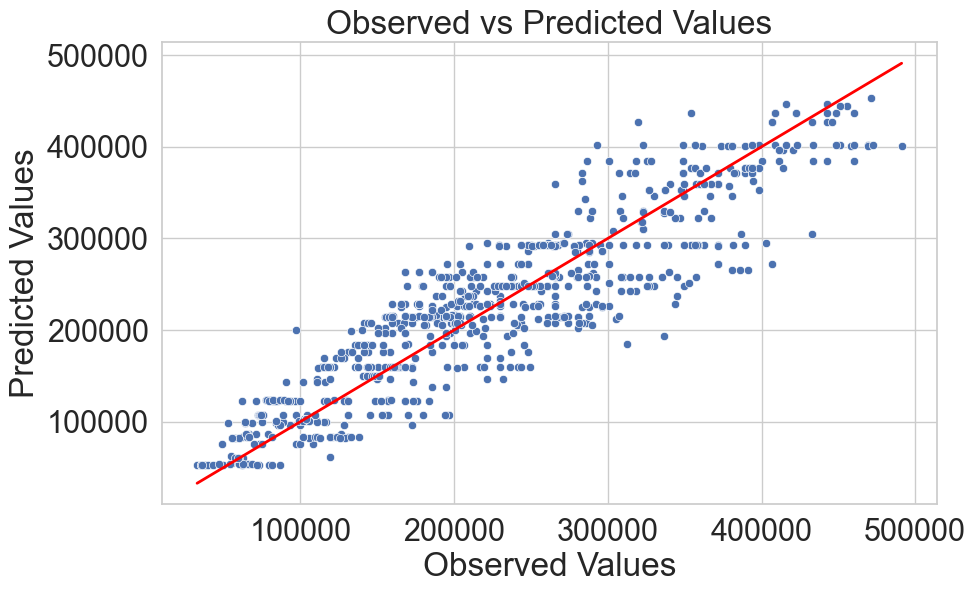

In [60]:
# Plotting the observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_initial_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values')
plt.show()


- The majority of the points are reasonably close to the red line, suggesting that the model has a good fit and the predictions are generally accurate.

- There is some spread around the red line, which is expected in real-world data. This spread indicates that there are prediction errors, but the errors are not excessively large for most points.

Text(0.5, 1.0, 'Residual Distribution')

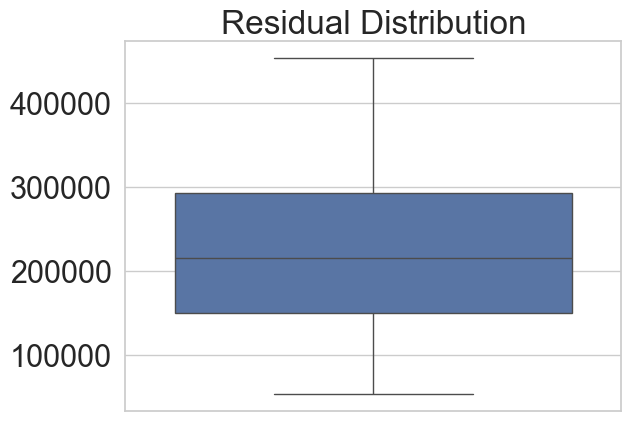

In [61]:
sns.boxplot(y_test_pred_initial_rf)
plt.title('Residual Distribution')

- The residuals are symmetrically distributed around the median, suggesting that there is no significant skewness in the model errors.

- The absence of outliers indicates that the model's predictions are generally consistent and there are no significant anomalies.

After hyperparameter tuning, I determined that the Random Forest Regression model achieved the best performance on the Daegu apartment price prediction task.

Random Forest Regression is a powerful ensemble learning technique that leverages the strengths of multiple decision trees to make more accurate predictions.

Here's how a Random Forest Regression model works: 
1. Sample with Replacement (Bootstrapping): The algorithm creates multiple training sets by randomly sampling data points (with replacement) from the original dataset. This process is called bootstrapping.
    - Imagine drawing data points out of a bag with replacement, so some data points might be chosen multiple times, while others might not be chosen at all.
2. Building Decision Trees: For each training set, a decision tree is grown. However, there's a twist compared to a regular decision tree.
    - At each node where the tree would normally split based on the best feature, the algorithm randomly selects a subset of features (typically the square root of the total features) to consider for the split.
    - This randomness helps prevent overfitting by reducing the reliance on any single feature and encouraging diversity among the trees.
3. Forest of Diverse Trees: By creating multiple trees with different training sets and random feature subsets, we end up with a 'forest' of diverse decision trees.

# 7. Interpretation Model

After hyperparameter tuning, I explored the importance of different features in predicting apartment prices using two complementary techniques: Gini importance and SHAP values.

Gini importance provides a global view of feature importance across the entire forest, while SHAP values offer a local view for each individual prediction.


By using both techniques, we gain a richer understanding of how features influence the model's behavior.


## 7.1 Feature Importance (Gini Importance)



Gini importance is a measure specific to Random Forest models that reflects how much a feature contributes to reducing the impurity (i.e., how well-mixed the data is) at each node of the decision trees.

Features that lead to more significant reductions in impurity at split points are considered more important for the model's predictions.




In [62]:
# Fit the preprocessor separately to get the feature names
preprocessor_tree.fit(X_train)

# Get the feature names after preprocessing
feature_names = preprocessor_tree.get_feature_names_out()

# Get the selected feature indices from the SelectFromModel step
selected_indices = rf.named_steps['feature_selection'].get_support(indices=True)

# Get the names of the selected features
selected_feature_names = feature_names[selected_indices]

# Remove prefixes from the selected feature names
clean_feature_names = [name.split('__')[-1] for name in selected_feature_names]

# Get feature importances from the regressor
feature_importances = rf.named_steps['regressor'].feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': clean_feature_names,
    'Gini Importance': feature_importances
}).sort_values(by='Gini Importance', ascending=False)

feature_importances_df

,Feature,Gini Importance
6,Size(sqf),0.444565
2,HallwayType_terraced,0.359901
4,N_Parkinglot(Basement),0.096910
5,N_FacilitiesInApt,0.065547
0,TimeToSubway_0~5min,0.023355
1,HallwayType_corridor,0.006470
3,YearBuilt_2007,0.003252


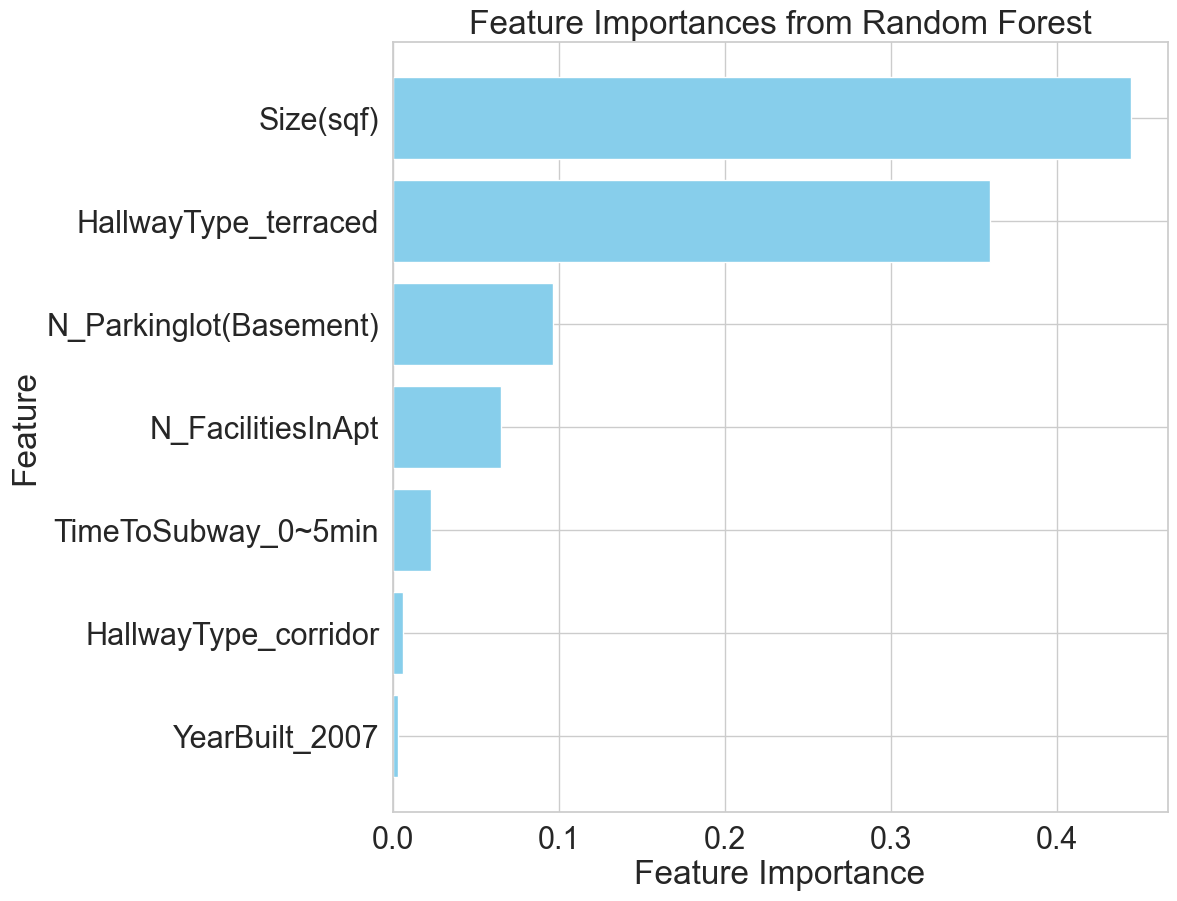

In [63]:
# Plot the feature importances
plt.figure(figsize=(10, 10))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Gini Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

1. Size(sqf) (Importance: 0.444565)
    - The size of the apartment in square feet is the most important feature in predicting the price. Larger apartments are generally more expensive, which is why this feature has the highest importance
    - Emphasizing the size of the apartment can significantly help in setting realistic price expectations.
2. HallwayType_terraced (Importance: 0.359901)
    - Apartments with a terraced hallway type are significantly contributing to the price prediction. This might be due to the perceived value and preference for this type of layout.
3. N_Parkinglot(Basement) (Importance: 0.096910)
    - The number of parking lots available in the basement is also a significant predictor. More parking space can add convenience and value to the property.
4. N_FacilitiesInApt (Importance: 0.065547)
    - The number of facilities within the apartment complex (such as gyms, pools, etc.) has a moderate impact on the price. More facilities generally enhance the living experience and thus increase the price.
5. TimeToSubway_0~5min (Importance: 0.023355)
    - Proximity to the subway (0-5 minutes) slightly influences the price, indicating that accessibility to public transportation is a valued feature.
6. HallwayType_corridor (Importance: 0.006470)
    - Apartments with a corridor hallway type have a minor impact on the price prediction compared to terraced hallways.
7. YearBuilt_2007 (Importance: 0.003252)
    - The year the apartment was built (2007) has the least importance in this model. This might be because the condition and other features of the apartment play a more significant role than just the year it was built.



Based on the feature importance analysis: Size, hallway type, and basement parking are the top three features influencing apartment prices. Emphasizing these in listings and marketing can attract potential buyers and set competitive prices.

## 7.2 SHAP (Shapey Value of Explanations)

The SHAP summary plot is a powerful tool for understanding the feature importance and their individual impacts on the model's predictions. The most important features, as identified by the plot, should be closely monitored and understood for their business implications.

 93%|=================== | 2992/3212 [00:14<00:01]       

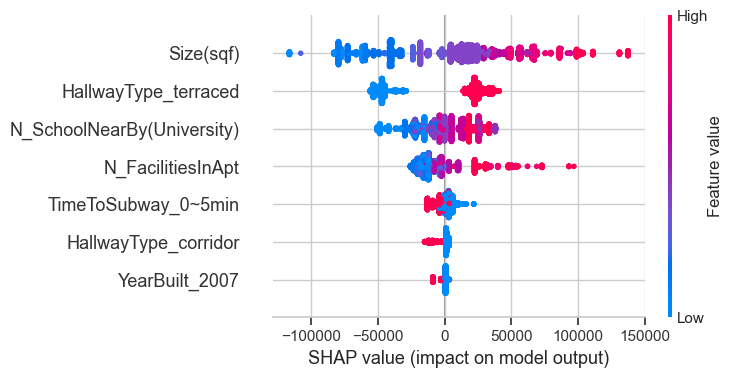

In [64]:
# To use SHAP, we need the preprocessed training data
X_train_transformed = rf.named_steps['preprocessor'].fit_transform(X_train)
X_train_selected = rf.named_steps['feature_selection'].fit_transform(X_train_transformed, y_train)

# Convert sparse matrix to dense
X_train_selected_dense = X_train_selected.toarray() if hasattr(X_train_selected, "toarray") else X_train_selected

# Get the feature names after encoding
onehot_encoder = rf.named_steps['preprocessor'].named_transformers_['cat']
encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_features)
all_feature_names = np.append(encoded_feature_names, numeric_features)
selected_feature_names = all_feature_names[rf.named_steps['feature_selection'].get_support()]

# Convert sparse matrix to dense
X_train_selected_dense = X_train_selected.toarray() if hasattr(X_train_selected, "toarray") else X_train_selected

# Create SHAP explainer
explainer = shap.Explainer(rf.named_steps['regressor'], X_train_selected_dense)
shap_values = explainer(X_train_selected_dense)

# Plot SHAP values
shap.summary_plot(shap_values, X_train_selected_dense, feature_names=selected_feature_names)

**Interpretation**
- Size(sqf) and HallwayType_terraced are the most influential features in predicting apartment prices in Daegu.
- Higher values of Size(sqf), HallwayType_terraced, and N_FacilitiesInApt generally increase the predicted apartment prices.


---

# 8. Limitation
- The model's predictions are valid within the range of Sale Prices in the training data, which is between **32,743 KRW and 508,849 KRW**. Predictions outside this range might be less reliable.

- The model primarily focuses on features such as **Size(sqf), HallwayType, N_Parkinglot(Basement), N_FacilitiesInApt, TimeToSubway and YearBuilt.** Other potential influential factors might not be included due to data limitations.

- The model assumes that the relationships between features and Sale Price remain **constant over time**. Significant **market changes** or **economic shifts** could affect its accuracy.

- The model does not account for macroeconomic factors such as **interest rates, economic growth, or government policies**, which could impact housing prices.



# 9. Conclusion and Recommendation

## Conclusion




Based on the modeling process, the following conclusions have been drawn:

- The best model obtained for the dataset Daegu Apartment to predict apartment sale prices is the **initial Random Forest model.**
- The **Random Forest (Initial) model** exhibited strong performance (good fit) with a lower **RMSE(41,726)**, **RMSPE(23,41%)** and **Adjusted R² 0.839** on the test set compared to other models, making it the best choice for predicting apartment prices in Daegu.
- The Stacking Regressor (Initial) also performed well, but the Random Forest model was slightly more **consistent and interpreteble**.
-  the RMSE on the test set is **41,726.17**, indicating that, on average, the model's predictions deviate from the actual apartment prices by approximately 41,726.17 South Korean Won (KRW).
- Feature Importance
    - **Feature Importance with Gini Importance**: Size, hallway type, and basement parking are the top three features influencing apartment prices.
    - **SHAP**: The most influential features in predicting SalePrice are Size(sqf), HallwayType_terraced, and N_SchoolNearBy(University). These features have the highest impact on the model's output.

**Addressing the Problem Statement**

The real estate market in Daegu is experiencing an oversupply of unsold apartment units, leading to market instability and financial challenges for property owners and developers. This model provides realistic price estimates which can help stabilize the market, ensuring affordability for potential buyers and supporting property owners in setting competitive prices.

If deployed, this model can have several positive impacts:

- **Market Stabilization**: By providing accurate price predictions, the model can help reduce the volume of unsold units, contributing to market stability.
- **Informed Decision Making**: Property owners and developers can set competitive prices based on the model's predictions, enhancing their ability to sell units more efficiently.
- **Affordability for Buyers**: Potential buyers can benefit from realistic price estimates, ensuring they make informed purchasing decisions and find affordable housing options.

## Recommendations


- Incorporate additional features such as economic indicators, interest rates, and government policies that might affect housing prices.

- Integrate more comprehensive datasets, including demographic information, proximity to amenities, and historical price trends, to improve the model's predictive power.

- Try other regression algorithms such as Neural Network to get any other comparison within the model


# Model Saving

In [65]:
# Model Pickling
filename = 'rf_model.sav'
pickle.dump(rf,open(filename,'wb'))